# **Dataset Preporcessing**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('american_bankruptcy.csv')

print(df.shape)
print(df.columns)
df.head()
df.info()
df.describe()

(78682, 21)
Index(['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


In [60]:
df_clean = df.drop(['company_name', 'year'], axis=1)

print(df['status_label'].value_counts())
df['status_label'] = df['status_label'].map({'alive': 0, 'failed': 1})
df_clean = df.drop(['company_name', 'year'], axis=1)
df_clean.head()
df_clean.info()

status_label
alive     73462
failed     5220
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status_label  78682 non-null  int64  
 1   X1            78682 non-null  float64
 2   X2            78682 non-null  float64
 3   X3            78682 non-null  float64
 4   X4            78682 non-null  float64
 5   X5            78682 non-null  float64
 6   X6            78682 non-null  float64
 7   X7            78682 non-null  float64
 8   X8            78682 non-null  float64
 9   X9            78682 non-null  float64
 10  X10           78682 non-null  float64
 11  X11           78682 non-null  float64
 12  X12           78682 non-null  float64
 13  X13           78682 non-null  float64
 14  X14           78682 non-null  float64
 15  X15           78682 non-null  float64
 16  X16           78682 non-null  float64
 17

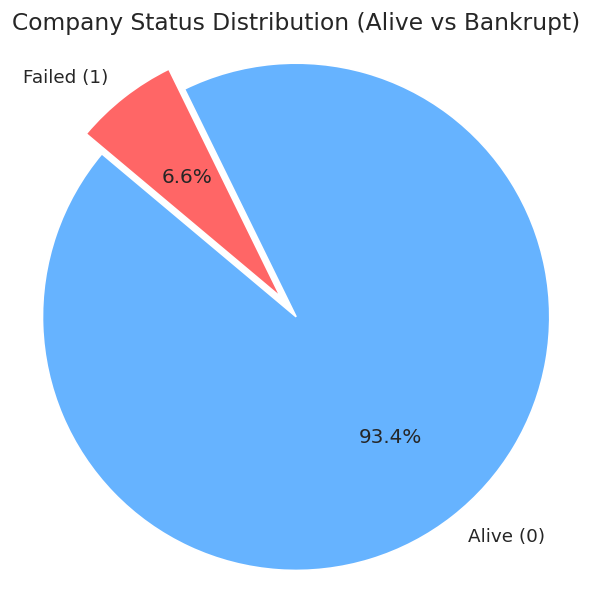

In [61]:
# count bankrupt (1) vs alive (0)
status_counts = df['status_label'].value_counts()

labels = ['Alive (0)', 'Failed (1)']
sizes = status_counts.values
colors = ['#66b3ff', '#ff6666']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0, 0.1))
plt.title('Company Status Distribution (Alive vs Bankrupt)', fontsize=14)
plt.axis('equal')
plt.show()

In [62]:
feature_cols = df_clean.columns.drop('status_label')

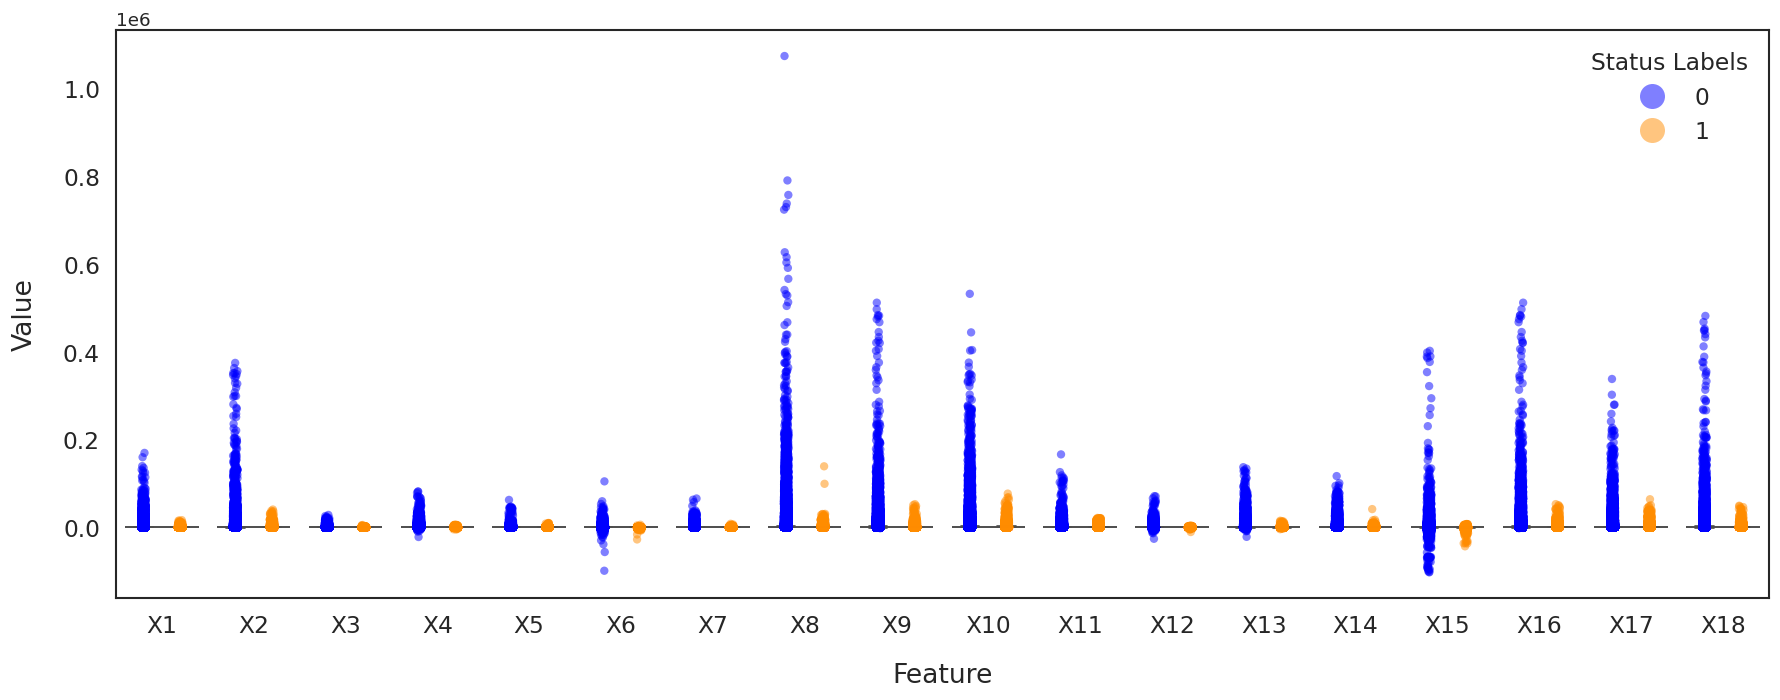

In [63]:
df_melted = df_clean.melt(id_vars='status_label', var_name='Feature', value_name='Value')
plt.figure(figsize=(15, 6))
custom_palette = {0: 'blue', 1: 'darkorange'}

sns.boxplot(
    data=df_melted,
    x='Feature',
    y='Value',
    hue='status_label',
    palette=custom_palette,
    showfliers=False,
    dodge=True,
    linewidth=1,
    legend=False
)

strip = sns.stripplot(
    data=df_melted,
    x='Feature',
    y='Value',
    hue='status_label',
    palette=custom_palette,
    dodge=True,
    alpha=0.5,
    size=5,
    jitter=0.05
)

handles, labels = strip.get_legend_handles_labels()

plt.legend(
    handles[:2],
    labels[:2],
    title='Status Labels',
    loc='upper right',
    fontsize=14,
    title_fontsize=14,
    markerscale=3,
    frameon=False
)


plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature', fontsize=16, labelpad=15)
plt.ylabel('Value', fontsize=16, labelpad=15)

plt.tight_layout()
plt.show()


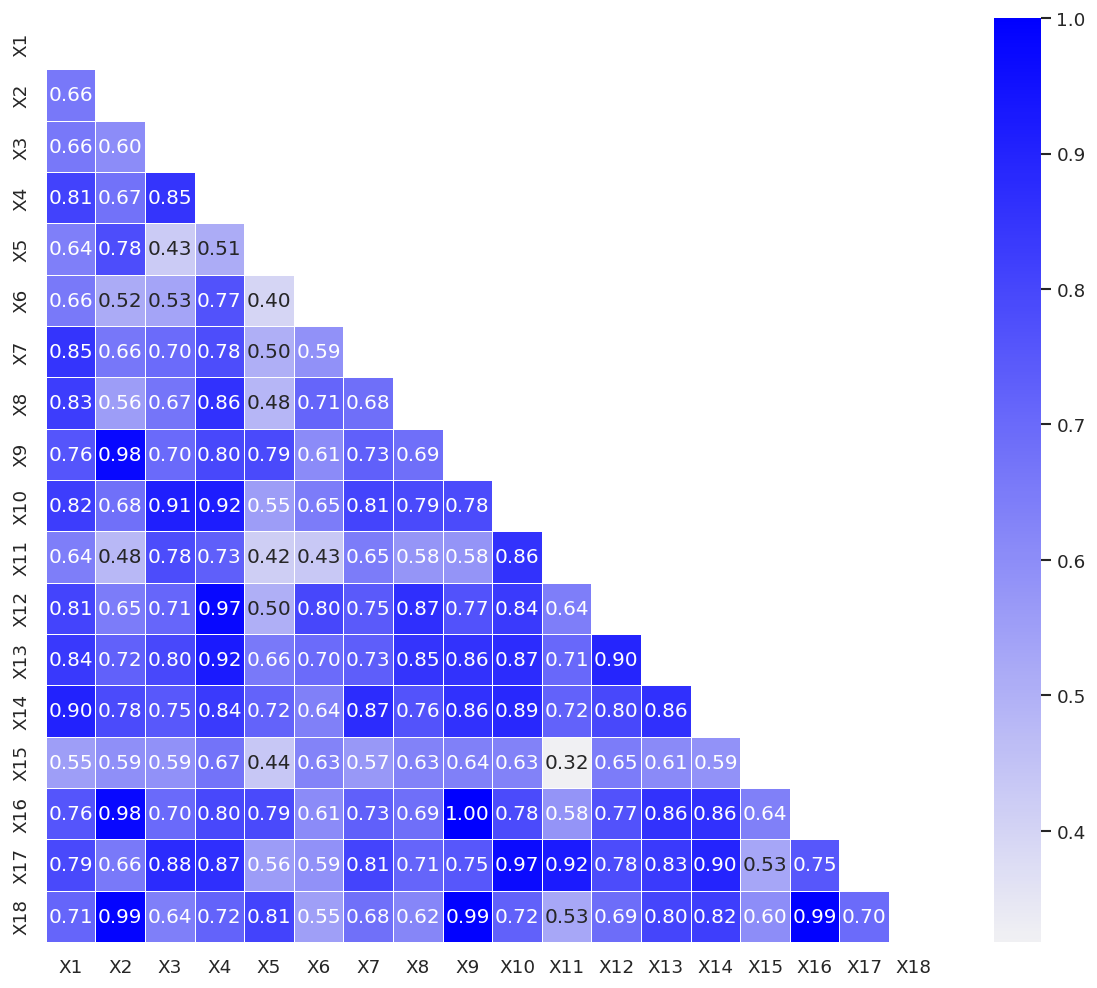

In [64]:
# drop non-numeric columns for correlation analysis
df_numeric = df.drop(columns=['company_name', 'status_label', 'year'])


corr_matrix = df_numeric.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.light_palette("blue", as_cmap=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, mask=mask, cmap=cmap)
plt.show()

# **Feature Selection**

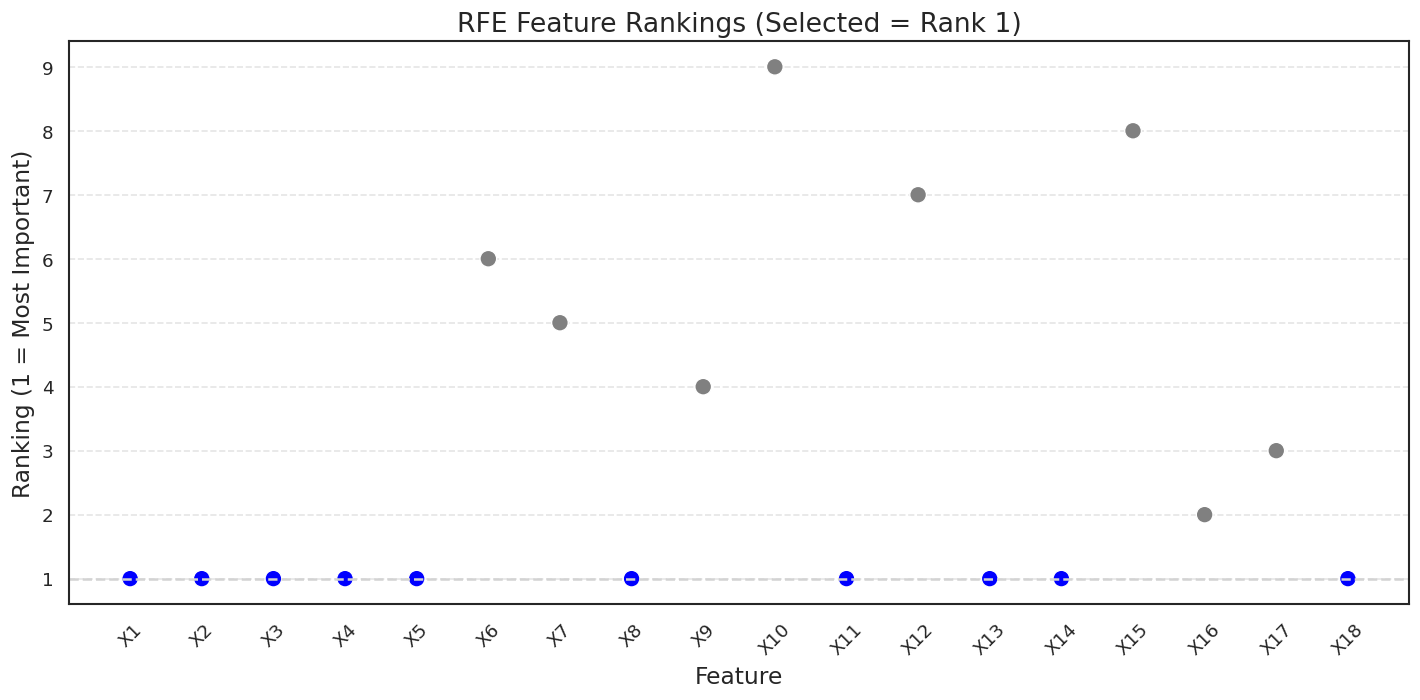

Logistic Regression Feature Importances:
    Feature  Importance  Feature_number
0       X1           1               1
1       X2           1               2
2       X3           1               3
3       X4           1               4
4       X5           1               5
5       X6           6               6
6       X7           5               7
7       X8           1               8
8       X9           4               9
9      X10           9              10
10     X11           1              11
11     X12           7              12
12     X13           1              13
13     X14           1              14
14     X15           8              15
15     X16           2              16
16     X17           3              17
17     X18           1              18


In [65]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

# apply RFE
selector_log_reg = RFE(log_reg, n_features_to_select=10)
selector_log_reg = selector_log_reg.fit(df_clean.drop('status_label', axis=1), df_clean['status_label'])

# selected features and their rankings
log_reg_selected_features = np.array(feature_cols)
log_reg_feature_importances = selector_log_reg.ranking_

log_reg_importance_df = pd.DataFrame({
    'Feature': log_reg_selected_features,
    'Importance': log_reg_feature_importances
})


log_reg_importance_df['Feature_number'] = log_reg_importance_df['Feature'].str.extract('(\d+)').astype(int)
log_reg_importance_df = log_reg_importance_df.sort_values(by='Feature_number')

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=log_reg_importance_df.sort_values('Feature_number'),
    x='Feature',
    y='Importance',
    hue=log_reg_importance_df['Importance'] == 1,
    palette={True: 'blue', False: 'gray'},
    s=100,
    legend=False
)

plt.axhline(1, color='lightgray', linestyle='--')  # mark selected cutoff
plt.title("RFE Feature Rankings (Selected = Rank 1)", fontsize=16)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Ranking (1 = Most Important)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


print("Logistic Regression Feature Importances:\n", log_reg_importance_df)


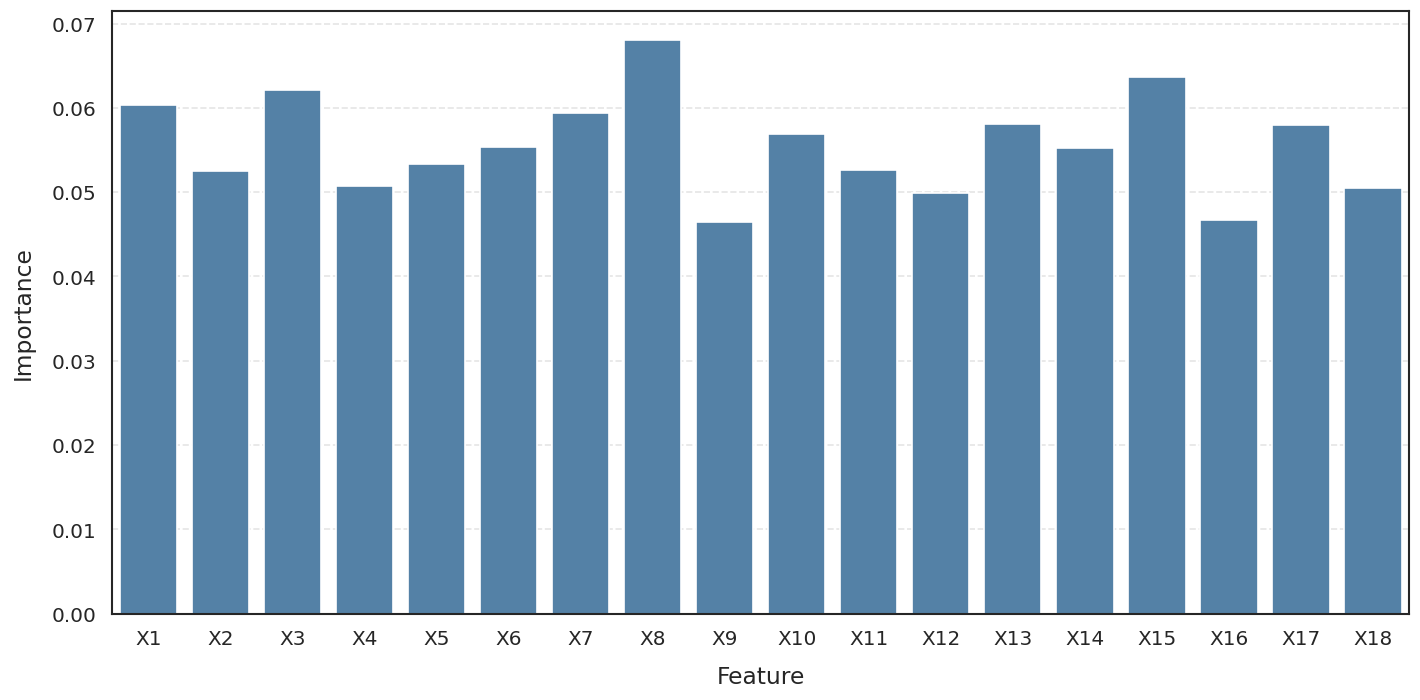

Random Forest Selected Features: ['X8', 'X15', 'X3', 'X1', 'X7', 'X13', 'X17', 'X10', 'X6', 'X14']


In [66]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(df_clean.drop('status_label', axis=1), df_clean['status_label'])
rf_feature_importances = rf_model.feature_importances_

rf_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_feature_importances
})

rf_importance_df['Feature_number'] = rf_importance_df['Feature'].str.extract('(\d+)').astype(int)
rf_importance_df = rf_importance_df.sort_values(by='Feature_number')

plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=rf_importance_df, color='steelblue')
plt.xlabel('Feature', fontsize=14, labelpad=10)
plt.ylabel('Importance', fontsize=14, labelpad=10)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("Random Forest Selected Features:", rf_importance_df.sort_values(by='Importance', ascending=False).head(10)['Feature'].tolist())

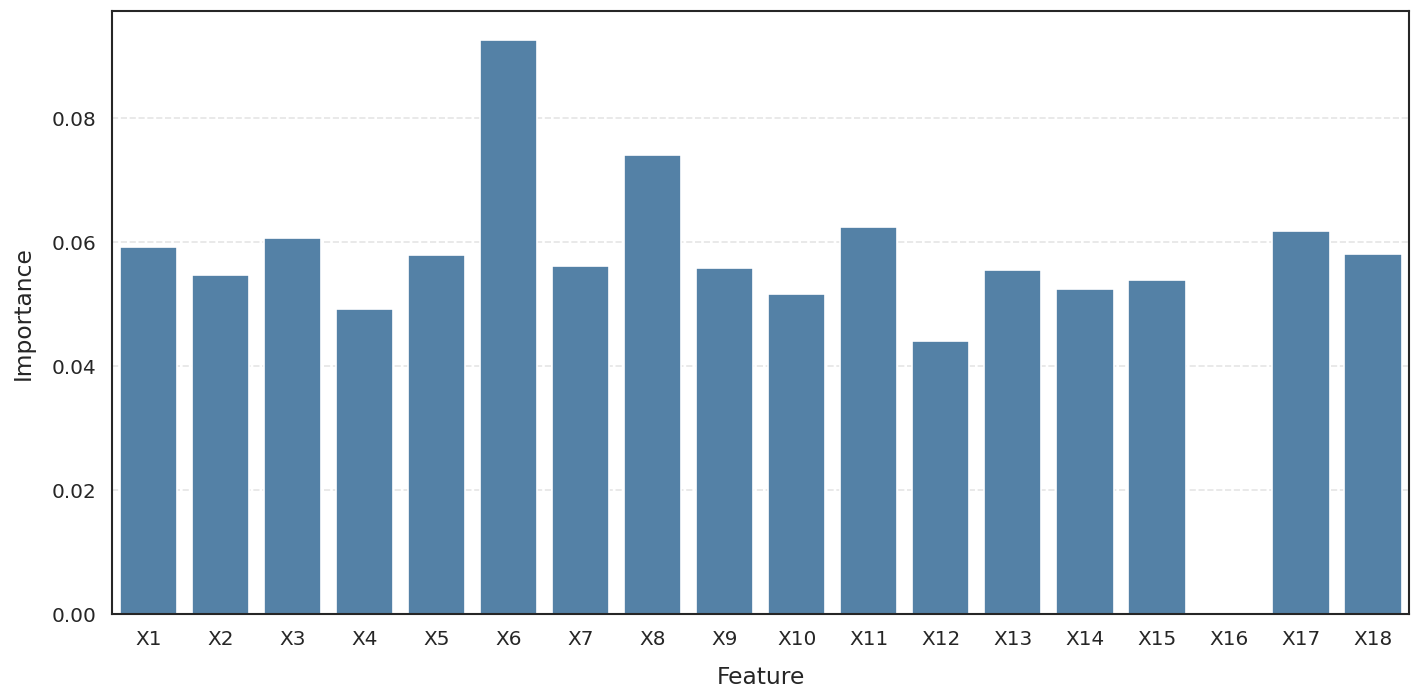

XGBoost Selected Features: ['X6', 'X8', 'X11', 'X17', 'X3', 'X1', 'X18', 'X5', 'X7', 'X9']


In [67]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(df_clean.drop('status_label', axis=1), df_clean['status_label'])
xgb_feature_importances = xgb_model.feature_importances_

xgb_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': xgb_feature_importances
})

xgb_importance_df['Feature_number'] = xgb_importance_df['Feature'].str.extract('(\d+)').astype(int)
xgb_importance_df = xgb_importance_df.sort_values(by='Feature_number')


plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=xgb_importance_df, color='steelblue')
plt.xlabel('Feature', fontsize=14, labelpad=10)
plt.ylabel('Importance', fontsize=14, labelpad=10)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("XGBoost Selected Features:", xgb_importance_df.sort_values(by='Importance', ascending=False).head(10)['Feature'].tolist())

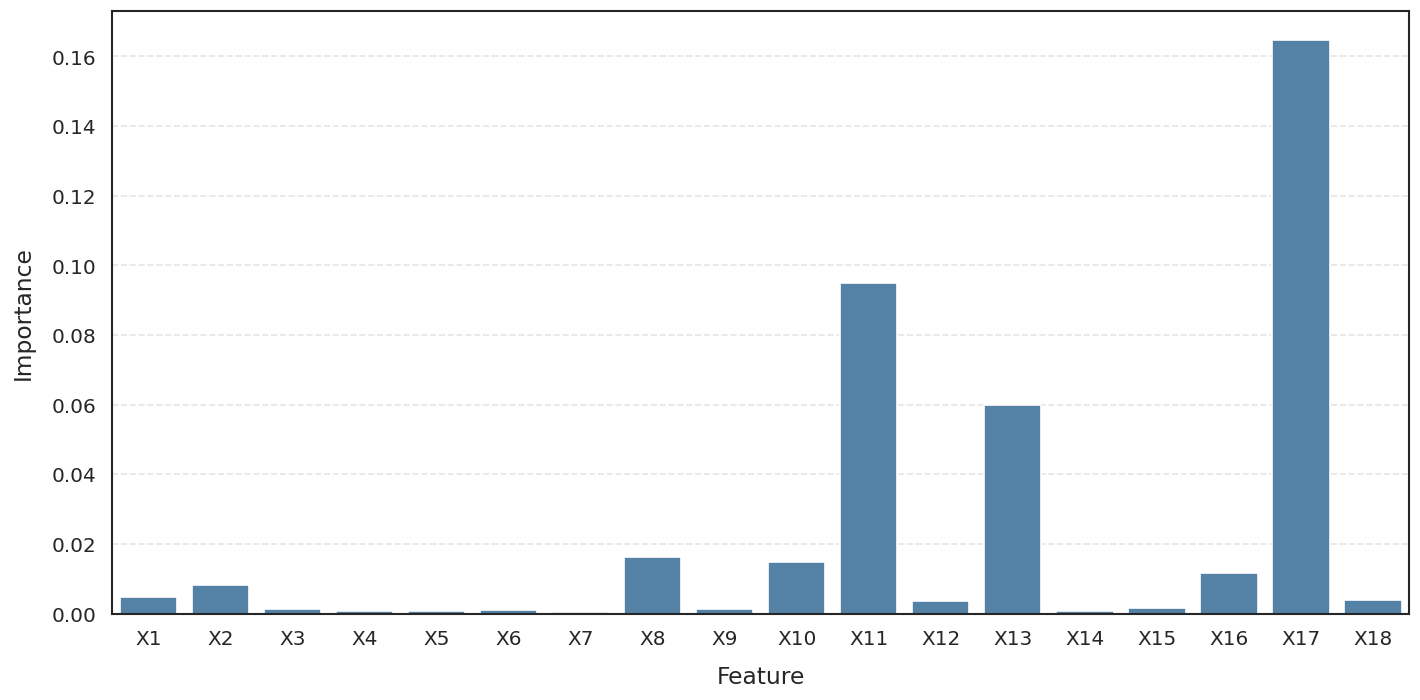

Neural Network Selected Features: ['X17', 'X11', 'X13', 'X8', 'X10', 'X16', 'X2', 'X1', 'X18', 'X12']


In [68]:
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPClassifier

# neural network
nn_model = MLPClassifier(max_iter=1000, random_state=42)
nn_model.fit(df_clean.drop('status_label', axis=1), df_clean['status_label'])

# permutation importance
result = permutation_importance(
    nn_model,
    df_clean.drop('status_label', axis=1),
    df_clean['status_label'],
    n_repeats=10,
    random_state=42
)

nn_feature_importances = result.importances_mean
nn_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': nn_feature_importances
})

nn_importance_df['Feature_number'] = nn_importance_df['Feature'].str.extract('(\d+)').astype(int)
nn_importance_df = nn_importance_df.sort_values(by='Feature_number')


plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=nn_importance_df, color='steelblue')
plt.xlabel('Feature', fontsize=14, labelpad=10)
plt.ylabel('Importance', fontsize=14, labelpad=10)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("Neural Network Selected Features:", nn_importance_df.sort_values(by='Importance', ascending=False).head(10)['Feature'].tolist())

# **Data Split (train/ test)**

In [69]:
X = df_clean.drop('status_label', axis=1)
y = df_clean['status_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# shape of the training set
print("Shape of the training set:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# distribution of the target labels (0 = non-bankrupt, 1 = bankrupt)
print("\nDistribution of the target labels in the training set:")
print(y_train.value_counts())


Shape of the training set:
X_train shape: (62945, 18)
y_train shape: (62945,)

Distribution of the target labels in the training set:
status_label
0    58793
1     4152
Name: count, dtype: int64


In [70]:
!pip install imbalanced-learn

In [71]:
from sklearn.utils import shuffle
# group 1: Original 80% training set (unmodified)
group1_X_train = X_train.copy()
group1_y_train = y_train.copy()

# group 2: 80% Non-bankrupt, 20% Bankrupt
non_bankrupt_train = X_train[y_train == 0]
bankrupt_train = X_train[y_train == 1]

print(f"Number of bankrupt companies: {len(bankrupt_train)}")
print(f"Number of non-bankrupt companies: {len(non_bankrupt_train)}")

# downsample non-bankrupt to 48,000
non_bankrupt_train_downsampled = non_bankrupt_train.sample(n=50256, random_state=42)
# upsample bankrupt to 12,000
bankrupt_train_upsampled = bankrupt_train.sample(n=12589, replace=True, random_state=42)

# combine to form the 80/20 balanced group
group2_X_train = pd.concat([non_bankrupt_train_downsampled, bankrupt_train_upsampled])
group2_y_train = pd.concat([y_train.loc[non_bankrupt_train_downsampled.index], y_train.loc[bankrupt_train_upsampled.index]])
group2_X_train, group2_y_train = shuffle(group2_X_train, group2_y_train, random_state=42)

# group 3: 50% Non-bankrupt, 50% Bankrupt (balanced)
# downsample non-bankrupt to 15,000
non_bankrupt_train_downsampled_group3 = non_bankrupt_train.sample(n=31473, random_state=42)

# upsample bankrupt to 15,000
bankrupt_train_upsampled_group3 = bankrupt_train.sample(n=31473, replace=True, random_state=42)

# combine to form the 50/50 balanced group
group3_X_train = pd.concat([non_bankrupt_train_downsampled_group3, bankrupt_train_upsampled_group3])
group3_y_train = pd.concat([y_train.loc[non_bankrupt_train_downsampled_group3.index], y_train.loc[bankrupt_train_upsampled_group3.index]])
group3_X_train, group3_y_train = shuffle(group3_X_train, group3_y_train, random_state=42)

# shapes of the groups
print(f"Group 1: {group1_X_train.shape[0]} rows")
print(f"Group 2: {group2_X_train.shape[0]} rows")
print(f"Group 3: {group3_X_train.shape[0]} rows")

# display the value counts for each group to confirm balance
print("\nGroup 1 Value Counts (Original 80% Training Set):")
print(y_train.value_counts())

print("\nGroup 2 Value Counts (80% Non-bankrupt, 20% Bankrupt):")
print(group2_y_train.value_counts())

print("\nGroup 3 Value Counts (50% Non-bankrupt, 50% Bankrupt):")
print(group3_y_train.value_counts())


Number of bankrupt companies: 4152
Number of non-bankrupt companies: 58793
Group 1: 62945 rows
Group 2: 62845 rows
Group 3: 62946 rows

Group 1 Value Counts (Original 80% Training Set):
status_label
0    58793
1     4152
Name: count, dtype: int64

Group 2 Value Counts (80% Non-bankrupt, 20% Bankrupt):
status_label
0    50256
1    12589
Name: count, dtype: int64

Group 3 Value Counts (50% Non-bankrupt, 50% Bankrupt):
status_label
1    31473
0    31473
Name: count, dtype: int64


# **Models**

## Z-score

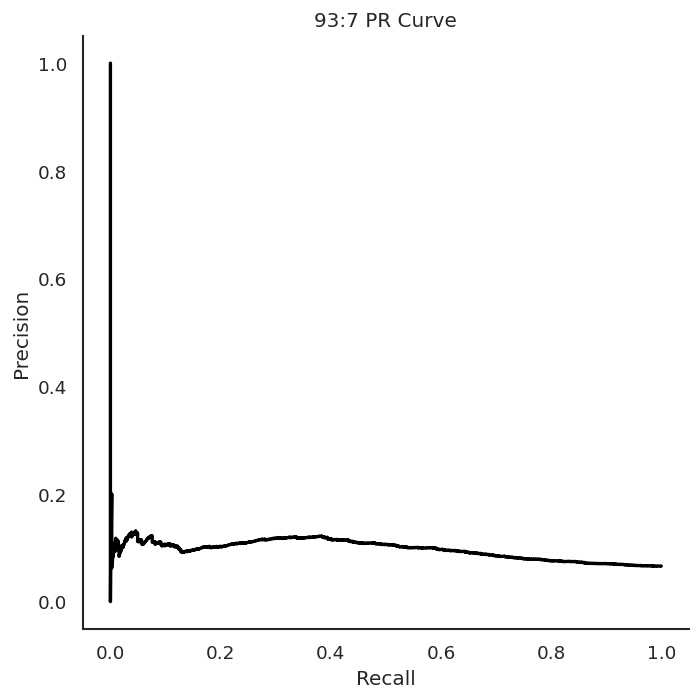

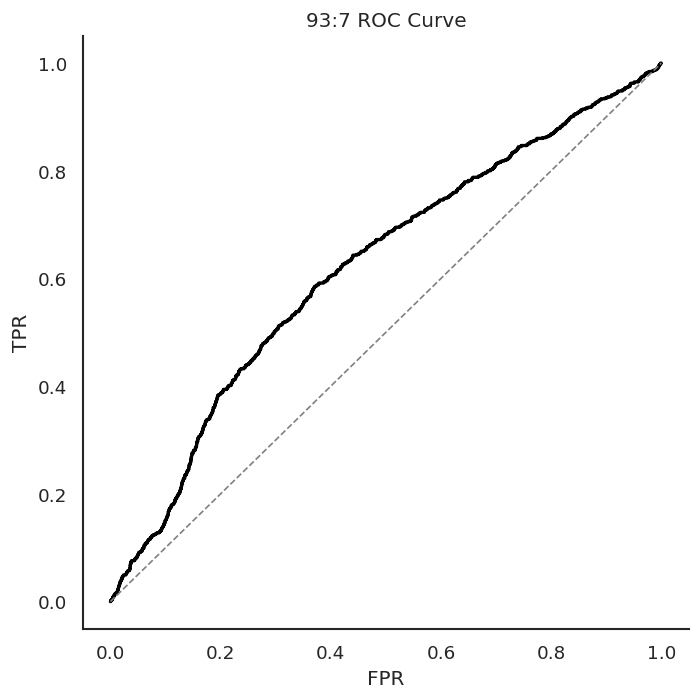


93:7 Z-Score Results
Accuracy: 0.93
ROC-AUC: 0.62
AP Score: 0.10
FN Rate: 1.00
FP Rate: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     11759
           1       0.00      0.00      0.00       830

    accuracy                           0.93     12589
   macro avg       0.47      0.50      0.48     12589
weighted avg       0.87      0.93      0.90     12589



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


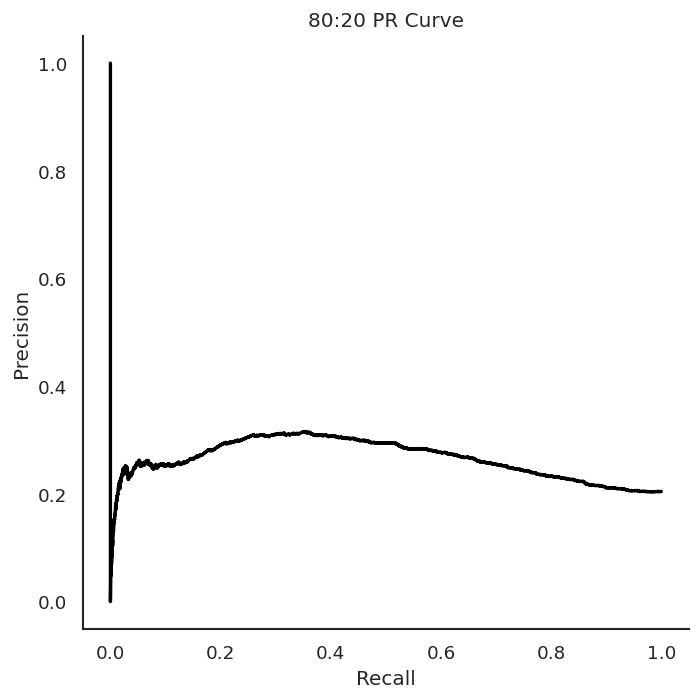

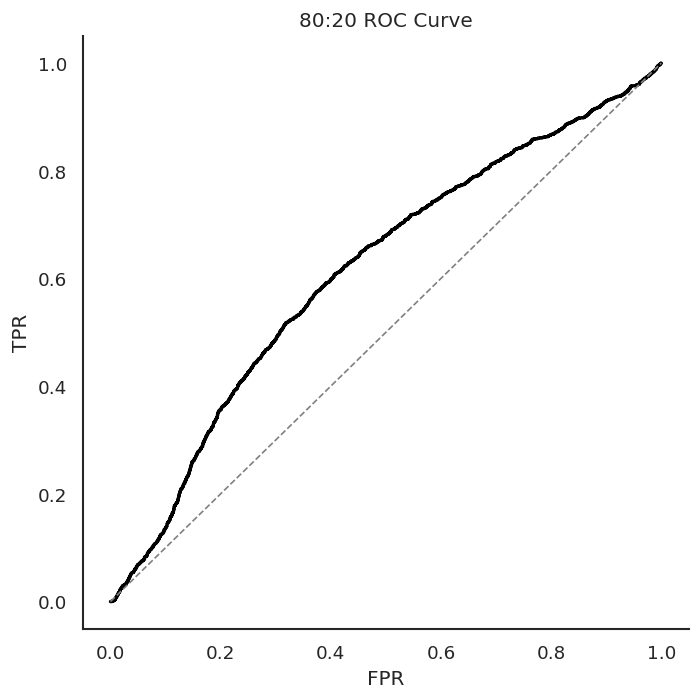


80:20 Z-Score Results
Accuracy: 0.80
ROC-AUC: 0.61
AP Score: 0.26
FN Rate: 1.00
FP Rate: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     10001
           1       0.00      0.00      0.00      2568

    accuracy                           0.80     12569
   macro avg       0.40      0.50      0.44     12569
weighted avg       0.63      0.80      0.71     12569



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


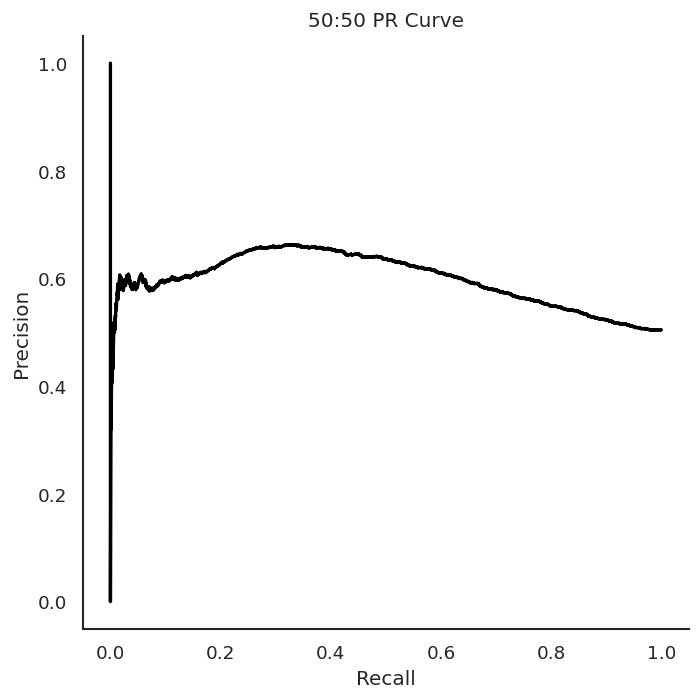

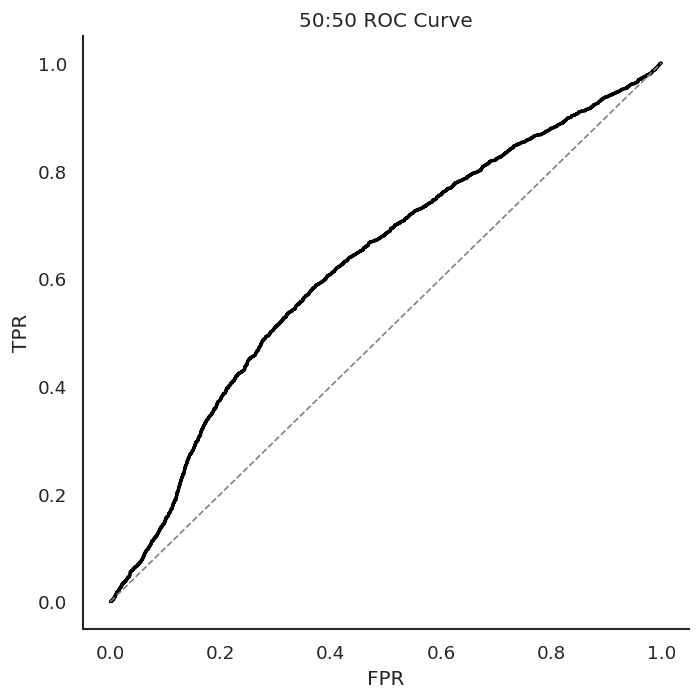


50:50 Z-Score Results
Accuracy: 0.49
ROC-AUC: 0.62
AP Score: 0.60
FN Rate: 1.00
FP Rate: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      6238
           1       0.43      0.00      0.01      6352

    accuracy                           0.49     12590
   macro avg       0.46      0.50      0.33     12590
weighted avg       0.46      0.49      0.33     12590



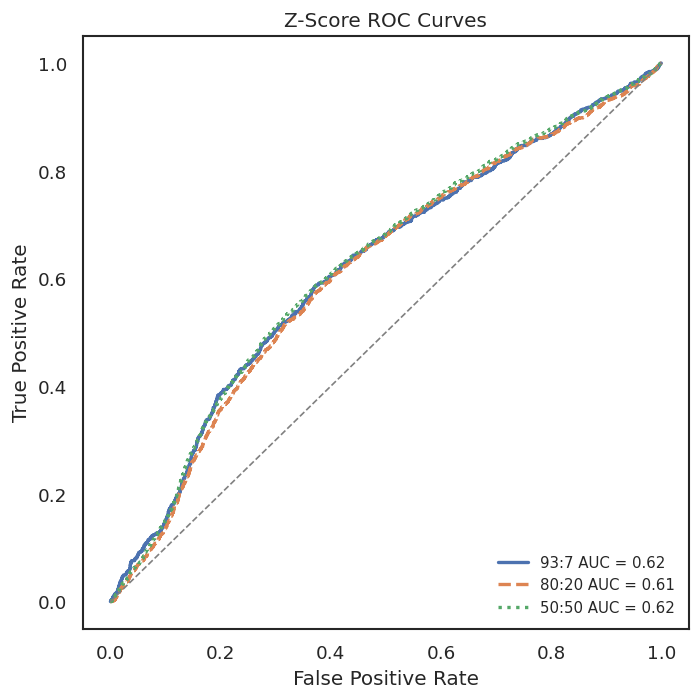

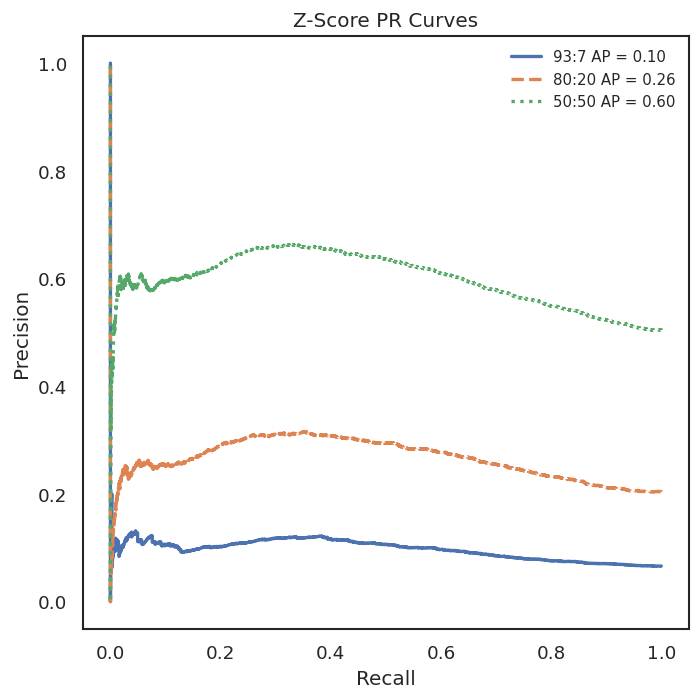

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    average_precision_score
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

sns.set_theme(style="white")

# Z-Score
def calculate_z_score(X):
    z_score = (
        (X['X1'] / X['X10']) +
        (X['X15'] / X['X10']) +
        (X['X12'] / X['X10']) +
        (X['X8'] / X['X17']) +
        (X['X9'] / X['X10'])
    )
    return z_score

short_labels = {
    "Group 1 (Original)": "93:7",
    "Group 2 (80/20 Balance)": "80:20",
    "Group 3 (50/50 Balance)": "50:50"
}

# line styles for combined plots
line_styles = ['solid', 'dashed', 'dotted']

# containers for combined plots
roc_data = {}
pr_data = {}

# evaluation Function
def train_and_evaluate_zscore(X_train, y_train, X_test, y_test, group_name):
    label = short_labels[group_name]

    X_train = X_train.copy()
    X_test = X_test.copy()
    X_train['Z_Score'] = calculate_z_score(X_train)
    X_test['Z_Score'] = calculate_z_score(X_test)

    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train[['Z_Score']], y_train)

    y_pred = model.predict(X_test[['Z_Score']])
    y_proba = model.predict_proba(X_test[['Z_Score']])[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    ap = average_precision_score(y_test, y_proba)

    cm = confusion_matrix(y_test, y_pred)
    FN_rate = cm[1, 0] / (cm[1, 0] + cm[1, 1])
    FP_rate = cm[0, 1] / (cm[0, 1] + cm[0, 0])

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    # store for combined plots
    roc_data[label] = (fpr, tpr, round(roc_auc, 2))
    pr_data[label] = (recall, precision, round(ap, 2))

    # individual PR Curve
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, color='black', linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{label} PR Curve')
    sns.despine()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    # individual ROC Curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='black', linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'{label} ROC Curve')
    sns.despine()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    # output metrics
    print(f"\n{label} Z-Score Results")
    print(f"Accuracy: {acc:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print(f"AP Score: {ap:.2f}")
    print(f"FN Rate: {FN_rate:.2f}")
    print(f"FP Rate: {FP_rate:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


# train on all groups
X_train_group1, X_test_group1, y_train_group1, y_test_group1 = train_test_split(group1_X_train, group1_y_train, test_size=0.2, random_state=42)
train_and_evaluate_zscore(X_train_group1, y_train_group1, X_test_group1, y_test_group1, "Group 1 (Original)")

X_train_group2, X_test_group2, y_train_group2, y_test_group2 = train_test_split(group2_X_train, group2_y_train, test_size=0.2, random_state=42)
train_and_evaluate_zscore(X_train_group2, y_train_group2, X_test_group2, y_test_group2, "Group 2 (80/20 Balance)")

X_train_group3, X_test_group3, y_train_group3, y_test_group3 = train_test_split(group3_X_train, group3_y_train, test_size=0.2, random_state=42)
train_and_evaluate_zscore(X_train_group3, y_train_group3, X_test_group3, y_test_group3, "Group 3 (50/50 Balance)")


# === Combined ROC Curve ===
plt.figure(figsize=(6, 6))

for i, (label, (fpr, tpr, auc)) in enumerate(roc_data.items()):
    plt.plot(fpr, tpr, linestyle=line_styles[i], linewidth=2, label=f'{label} AUC = {auc:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Z-Score ROC Curves')
plt.legend(loc='lower right', frameon=False, fontsize=9)
sns.despine()

for spine in plt.gca().spines.values():
    spine.set_visible(True)

plt.grid(False)
plt.tight_layout()
plt.show()


# === Combined PR Curve ===
plt.figure(figsize=(6, 6))

for i, (label, (recall, precision, ap)) in enumerate(pr_data.items()):
    plt.plot(recall, precision, linestyle=line_styles[i], linewidth=2, label=f'{label} AP = {ap:.2f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Z-Score PR Curves')
plt.legend(loc='upper right', frameon=False, fontsize=9)
sns.despine()

for spine in plt.gca().spines.values():
    spine.set_visible(True)

plt.grid(False)
plt.tight_layout()
plt.show()



## Logistic Regression

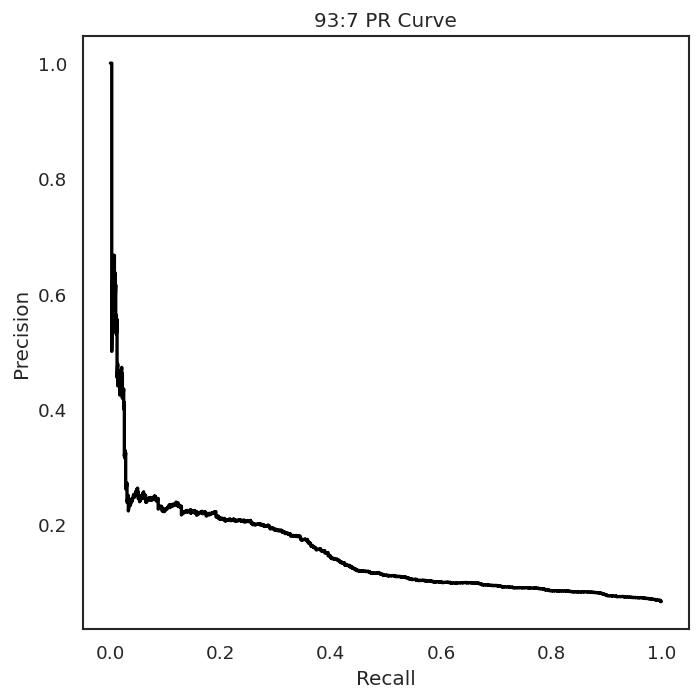

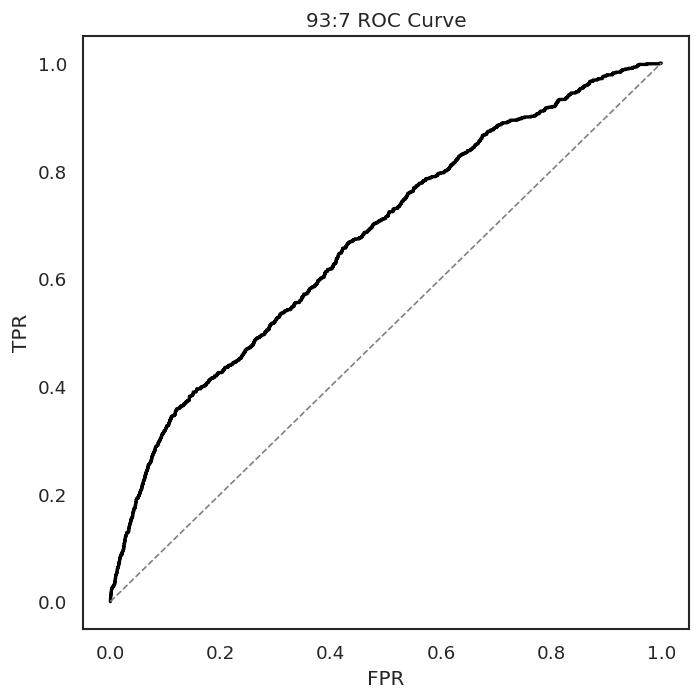


93:7 - Logistic Regression Results
Accuracy: 0.9342 (93.42%)
ROC-AUC: 0.6717 (67.17%)
FN Rate: 0.9952 (99.52%)
FP Rate: 0.0002 (0.02%)
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     11759
           1       0.67      0.00      0.01       830

    accuracy                           0.93     12589
   macro avg       0.80      0.50      0.49     12589
weighted avg       0.92      0.93      0.90     12589



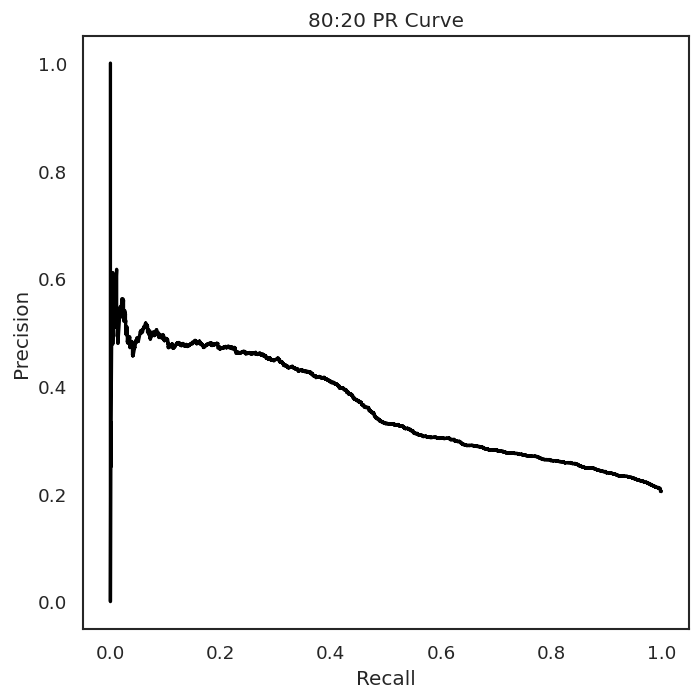

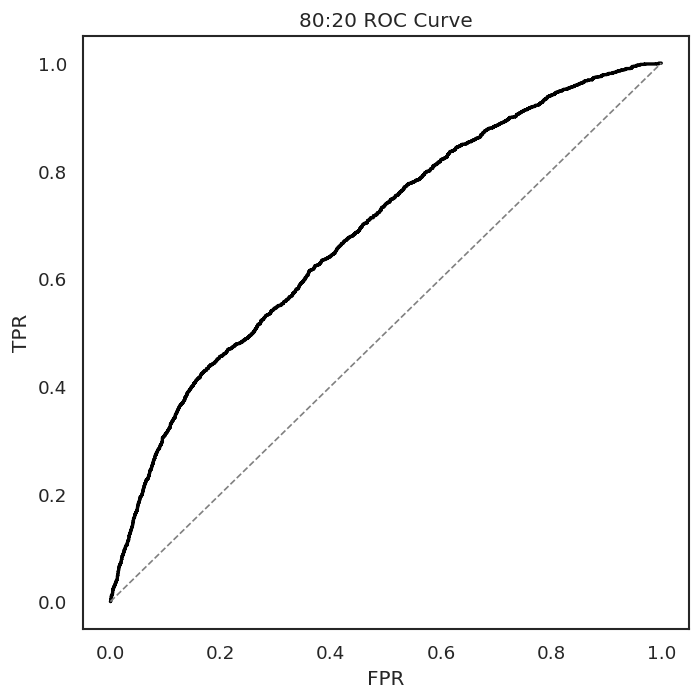


80:20 - Logistic Regression Results
Accuracy: 0.7956 (79.56%)
ROC-AUC: 0.6841 (68.41%)
FN Rate: 0.9864 (98.64%)
FP Rate: 0.0036 (0.36%)
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     10001
           1       0.49      0.01      0.03      2568

    accuracy                           0.80     12569
   macro avg       0.65      0.51      0.46     12569
weighted avg       0.74      0.80      0.71     12569



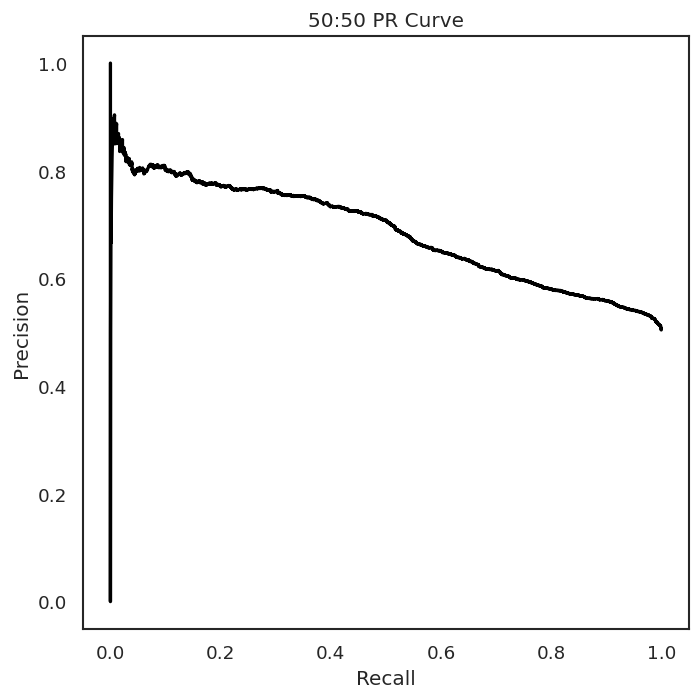

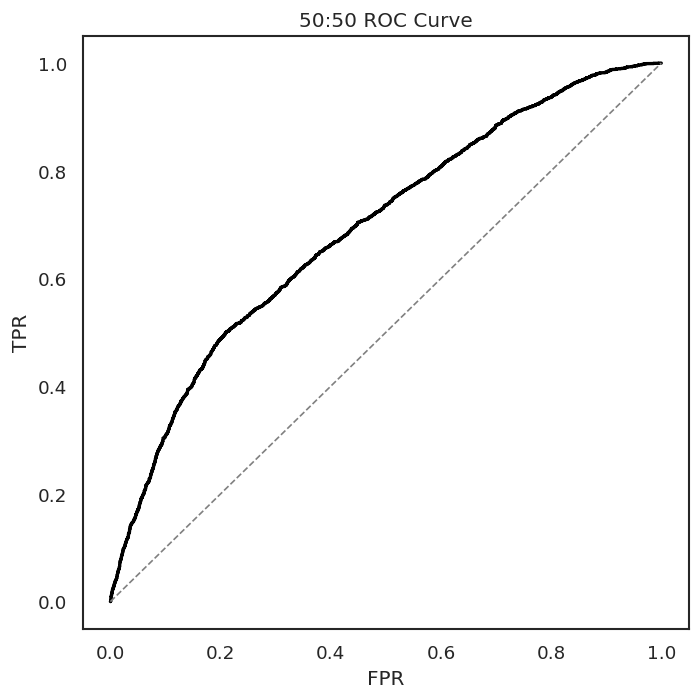


50:50 - Logistic Regression Results
Accuracy: 0.5991 (59.91%)
ROC-AUC: 0.6911 (69.11%)
FN Rate: 0.1503 (15.03%)
FP Rate: 0.6560 (65.60%)
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.34      0.46      6238
           1       0.57      0.85      0.68      6352

    accuracy                           0.60     12590
   macro avg       0.63      0.60      0.57     12590
weighted avg       0.63      0.60      0.57     12590



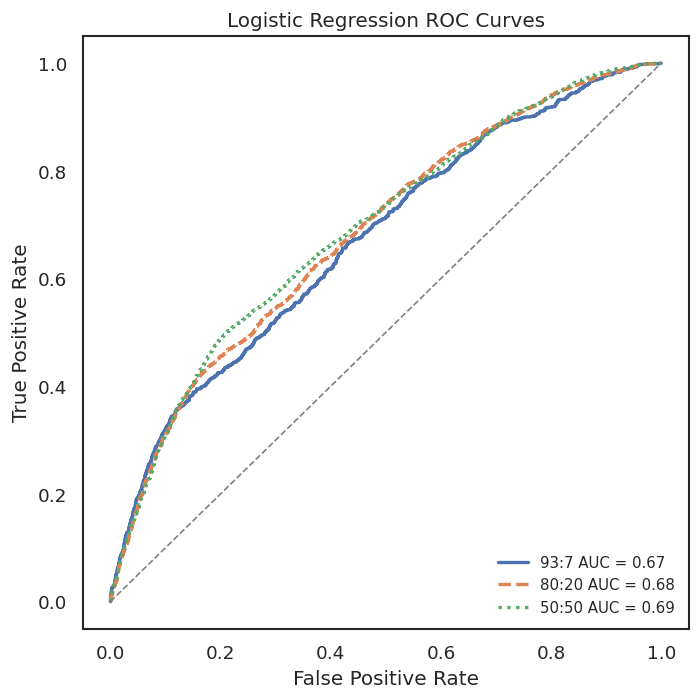

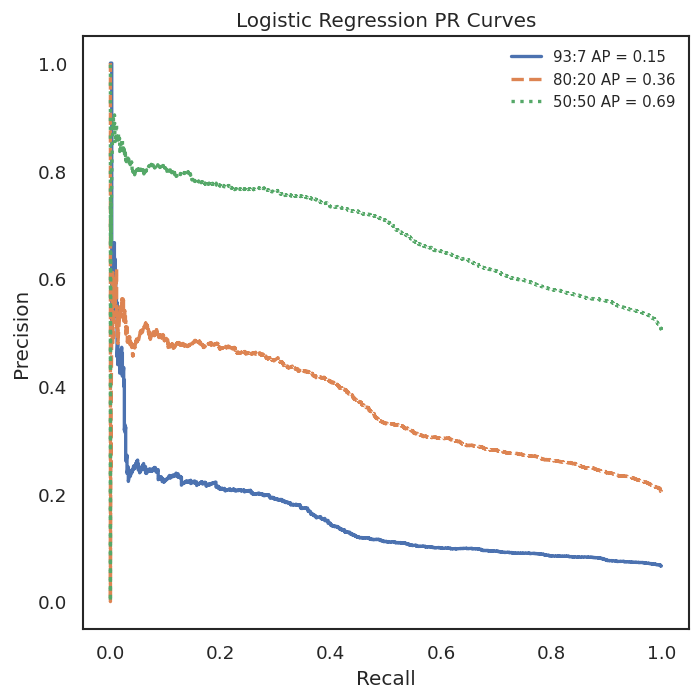

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score,
    confusion_matrix, precision_recall_curve, roc_curve,
    average_precision_score
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set_theme(style="white")

# logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg_selected_features = np.array([
    'X1', 'X2', 'X3', 'X4', 'X5', 'X8', 'X13', 'X11', 'X14', 'X18'
])

roc_data = {}
pr_data = {}
line_styles = ['solid', 'dashed', 'dotted']
simple_labels = ['93:7', '80:20', '50:50']

def train_and_evaluate(model, X_train, y_train, X_test, y_test, label, selected_features):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[selected_features])
    X_test_scaled = scaler.transform(X_test[selected_features])

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)

    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1, 0]
    FP = cm[0, 1]
    FN_rate = FN / (FN + cm[1, 1])
    FP_rate = FP / (FP + cm[0, 0])

    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    roc_data[label] = (fpr, tpr, round(roc_auc, 2))
    pr_data[label] = (recall, precision, round(avg_precision, 2))

    # individual PR Curve
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, color='black', linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{label} PR Curve')
    sns.despine()
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    # individual ROC Curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='black', linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'{label} ROC Curve')
    sns.despine()
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    print(f"\n{label} - Logistic Regression Results")
    print(f"Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)")
    print(f"ROC-AUC: {roc_auc:.4f} ({roc_auc * 100:.2f}%)")
    print(f"FN Rate: {FN_rate:.4f} ({FN_rate * 100:.2f}%)")
    print(f"FP Rate: {FP_rate:.4f} ({FP_rate * 100:.2f}%)")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


#  training and evaluation
X_train_group1, X_test_group1, y_train_group1, y_test_group1 = train_test_split(group1_X_train, group1_y_train, test_size=0.2, random_state=42)
train_and_evaluate(log_reg, X_train_group1, y_train_group1, X_test_group1, y_test_group1, "93:7", log_reg_selected_features)

X_train_group2, X_test_group2, y_train_group2, y_test_group2 = train_test_split(group2_X_train, group2_y_train, test_size=0.2, random_state=42)
train_and_evaluate(log_reg, X_train_group2, y_train_group2, X_test_group2, y_test_group2, "80:20", log_reg_selected_features)

X_train_group3, X_test_group3, y_train_group3, y_test_group3 = train_test_split(group3_X_train, group3_y_train, test_size=0.2, random_state=42)
train_and_evaluate(log_reg, X_train_group3, y_train_group3, X_test_group3, y_test_group3, "50:50", log_reg_selected_features)


# === Combined ROC Curve ===
plt.figure(figsize=(6, 6))
for i, (label, (fpr, tpr, auc)) in enumerate(roc_data.items()):
    plt.plot(fpr, tpr, linestyle=line_styles[i], linewidth=2, label=f'{label} AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curves')
plt.legend(loc='lower right', frameon=False, fontsize=9)
sns.despine()
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.grid(False)
plt.tight_layout()
plt.show()

# === Combined PR Curve ===
plt.figure(figsize=(6, 6))
for i, (label, (recall, precision, ap)) in enumerate(pr_data.items()):
    plt.plot(recall, precision, linestyle=line_styles[i], linewidth=2, label=f'{label} AP = {ap:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression PR Curves')
plt.legend(loc='upper right', frameon=False, fontsize=9)
sns.despine()
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.grid(False)
plt.tight_layout()
plt.show()


## Random Forest


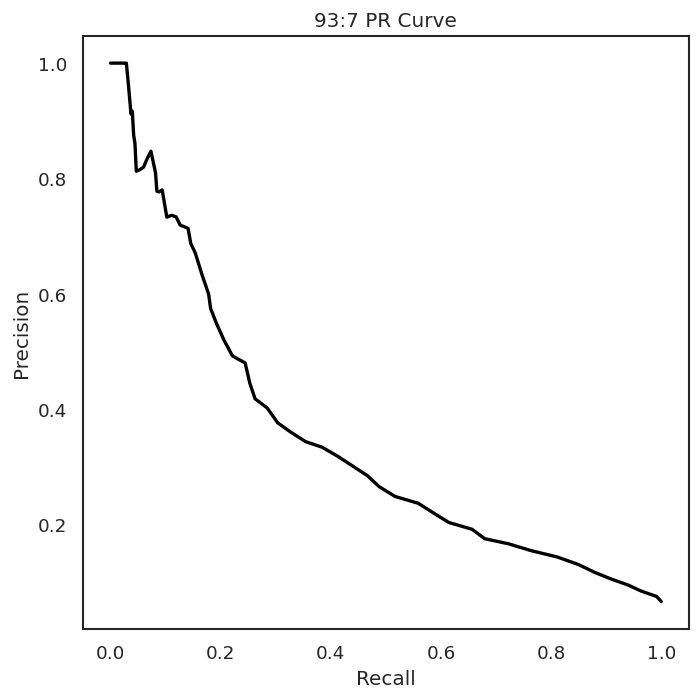

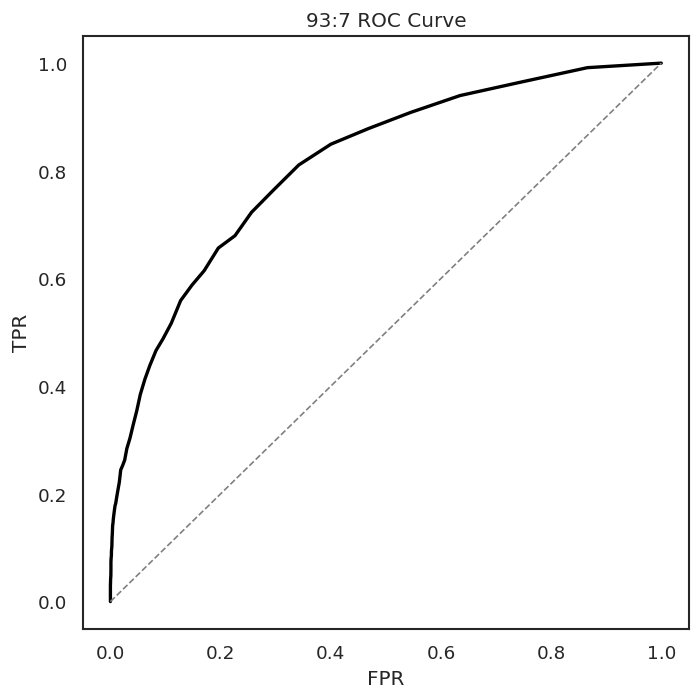


93:7 - Random Forest Results
Accuracy: 0.9365 (93.65%)
ROC-AUC: 0.8131 (81.31%)
FN Rate: 0.9554 (95.54%)
FP Rate: 0.0005 (0.05%)
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11759
           1       0.86      0.04      0.08       830

    accuracy                           0.94     12589
   macro avg       0.90      0.52      0.53     12589
weighted avg       0.93      0.94      0.91     12589



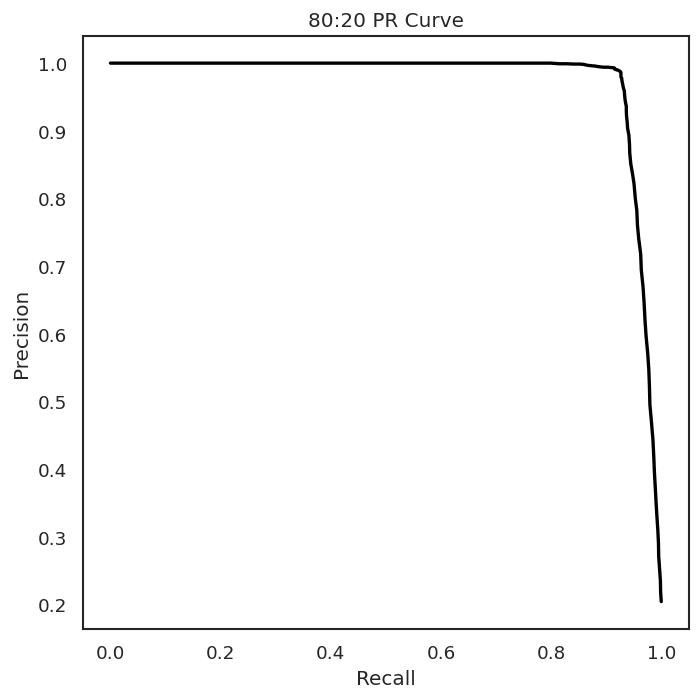

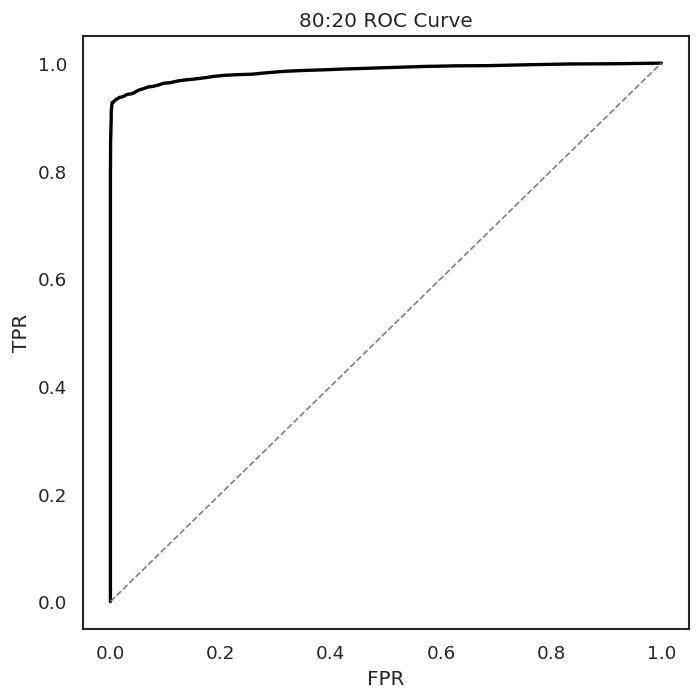


80:20 - Random Forest Results
Accuracy: 0.9824 (98.24%)
ROC-AUC: 0.9855 (98.55%)
FN Rate: 0.0732 (7.32%)
FP Rate: 0.0033 (0.33%)
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10001
           1       0.99      0.93      0.96      2568

    accuracy                           0.98     12569
   macro avg       0.98      0.96      0.97     12569
weighted avg       0.98      0.98      0.98     12569



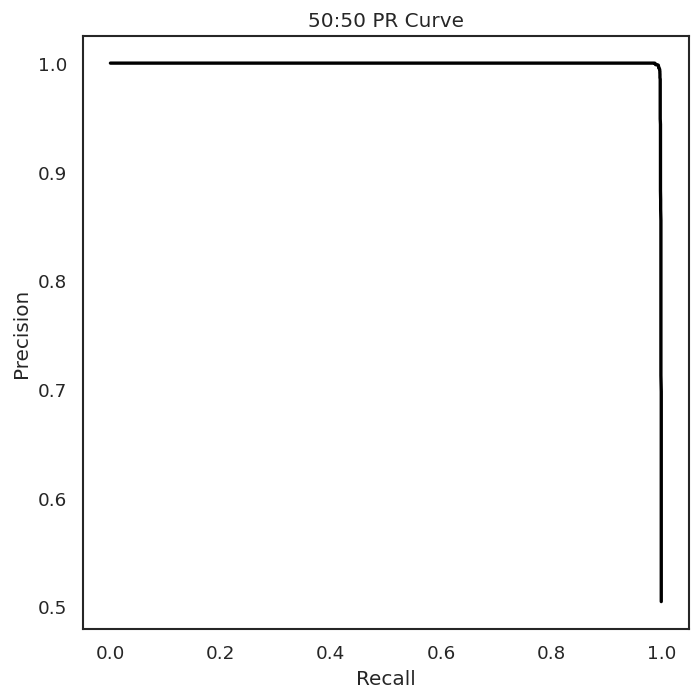

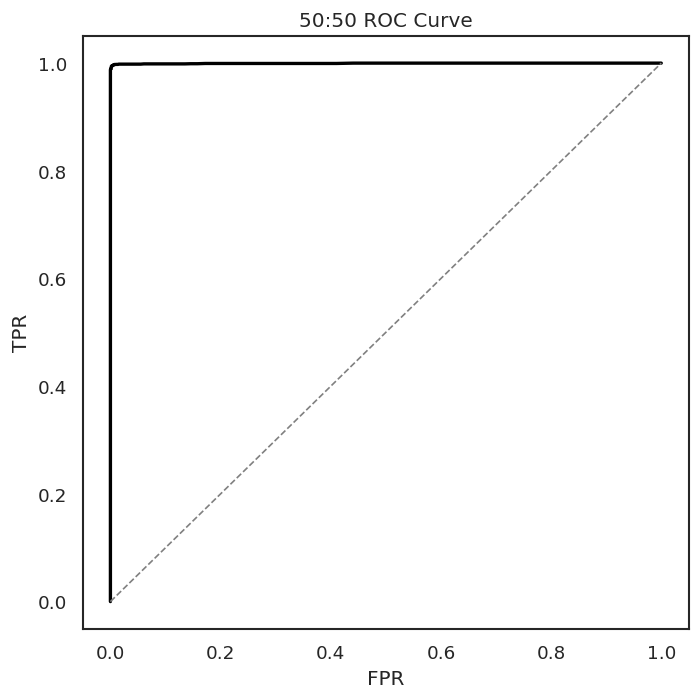


50:50 - Random Forest Results
Accuracy: 0.9894 (98.94%)
ROC-AUC: 0.9996 (99.96%)
FN Rate: 0.0019 (0.19%)
FP Rate: 0.0196 (1.96%)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6238
           1       0.98      1.00      0.99      6352

    accuracy                           0.99     12590
   macro avg       0.99      0.99      0.99     12590
weighted avg       0.99      0.99      0.99     12590



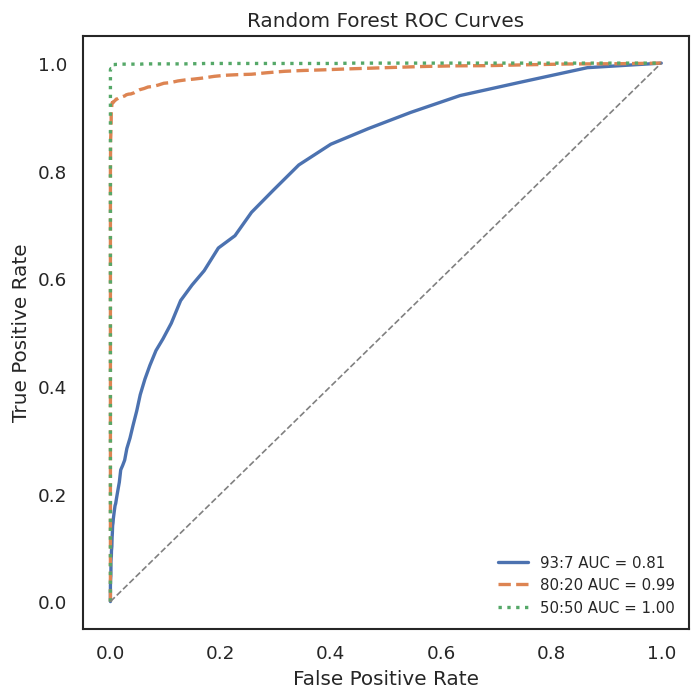

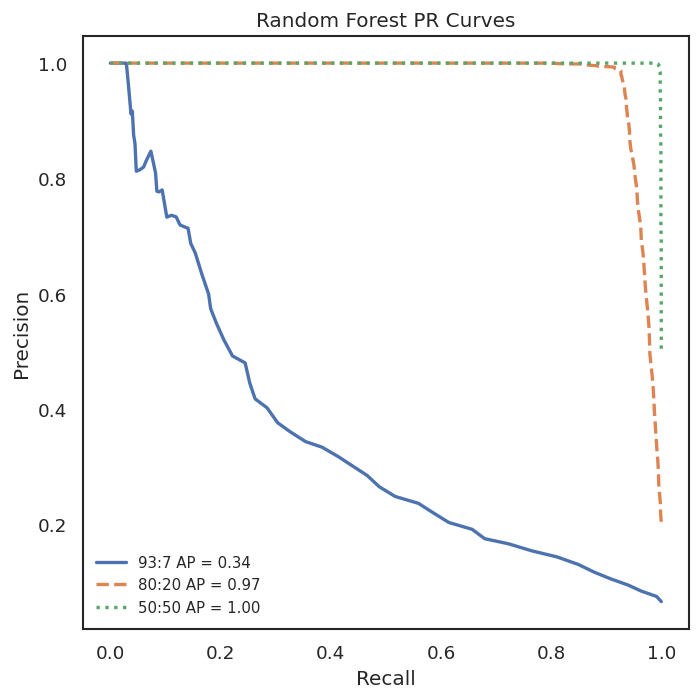

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score,
    confusion_matrix, precision_recall_curve, roc_curve,
    average_precision_score
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="white")

# random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected_features = np.array([
    'X8', 'X15', 'X3', 'X1', 'X7', 'X13', 'X17', 'X10', 'X6', 'X14'
])

rf_roc_data = {}
rf_pr_data = {}
line_styles = ['solid', 'dashed', 'dotted']
simple_labels = ['93:7', '80:20', '50:50']

def train_and_evaluate_rf(model, X_train, y_train, X_test, y_test, label, selected_features):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[selected_features])
    X_test_scaled = scaler.transform(X_test[selected_features])

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)

    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1, 0]
    FP = cm[0, 1]
    FN_rate = FN / (FN + cm[1, 1])
    FP_rate = FP / (FP + cm[0, 0])

    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    rf_roc_data[label] = (fpr, tpr, round(roc_auc, 2))
    rf_pr_data[label] = (recall, precision, round(avg_precision, 2))

    # individual PR Curve
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, color='black', linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{label} PR Curve')
    sns.despine()
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    # individual ROC Curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='black', linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'{label} ROC Curve')
    sns.despine()
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    print(f"\n{label} - Random Forest Results")
    print(f"Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)")
    print(f"ROC-AUC: {roc_auc:.4f} ({roc_auc * 100:.2f}%)")
    print(f"FN Rate: {FN_rate:.4f} ({FN_rate * 100:.2f}%)")
    print(f"FP Rate: {FP_rate:.4f} ({FP_rate * 100:.2f}%)")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


# training and evalutaion
X_train_group1, X_test_group1, y_train_group1, y_test_group1 = train_test_split(group1_X_train, group1_y_train, test_size=0.2, random_state=42)
train_and_evaluate_rf(rf, X_train_group1, y_train_group1, X_test_group1, y_test_group1, "93:7", rf_selected_features)

X_train_group2, X_test_group2, y_train_group2, y_test_group2 = train_test_split(group2_X_train, group2_y_train, test_size=0.2, random_state=42)
train_and_evaluate_rf(rf, X_train_group2, y_train_group2, X_test_group2, y_test_group2, "80:20", rf_selected_features)

X_train_group3, X_test_group3, y_train_group3, y_test_group3 = train_test_split(group3_X_train, group3_y_train, test_size=0.2, random_state=42)
train_and_evaluate_rf(rf, X_train_group3, y_train_group3, X_test_group3, y_test_group3, "50:50", rf_selected_features)


# === Combined ROC Curve ===
plt.figure(figsize=(6, 6))
for i, (label, (fpr, tpr, auc)) in enumerate(rf_roc_data.items()):
    plt.plot(fpr, tpr, linestyle=line_styles[i], linewidth=2, label=f'{label} AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curves')
plt.legend(loc='lower right', frameon=False, fontsize=9)
sns.despine()
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.grid(False)
plt.tight_layout()
plt.show()

# === Combined PR Curve ===
plt.figure(figsize=(6, 6))
for i, (label, (recall, precision, ap)) in enumerate(rf_pr_data.items()):
    plt.plot(recall, precision, linestyle=line_styles[i], linewidth=2, label=f'{label} AP = {ap:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest PR Curves')
plt.legend(loc='lower left', frameon=False, fontsize=9)
sns.despine()
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.grid(False)
plt.tight_layout()
plt.show()


## Neural Network

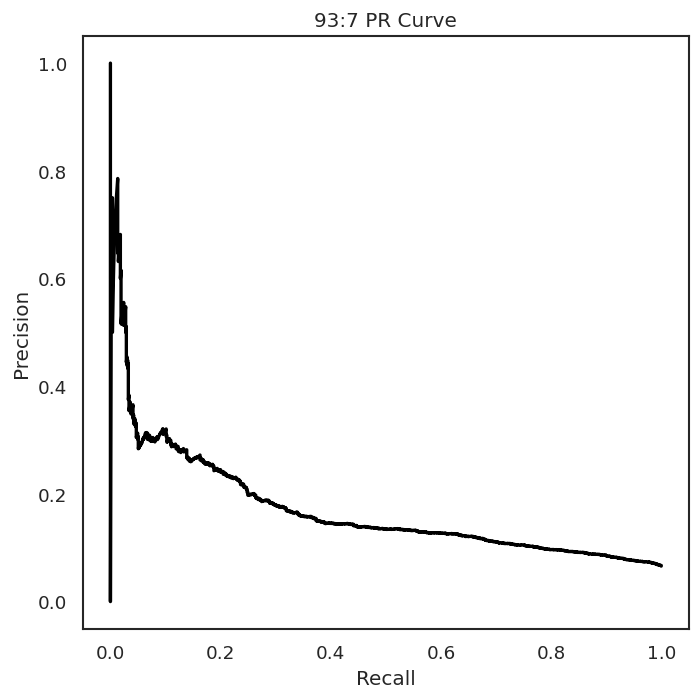

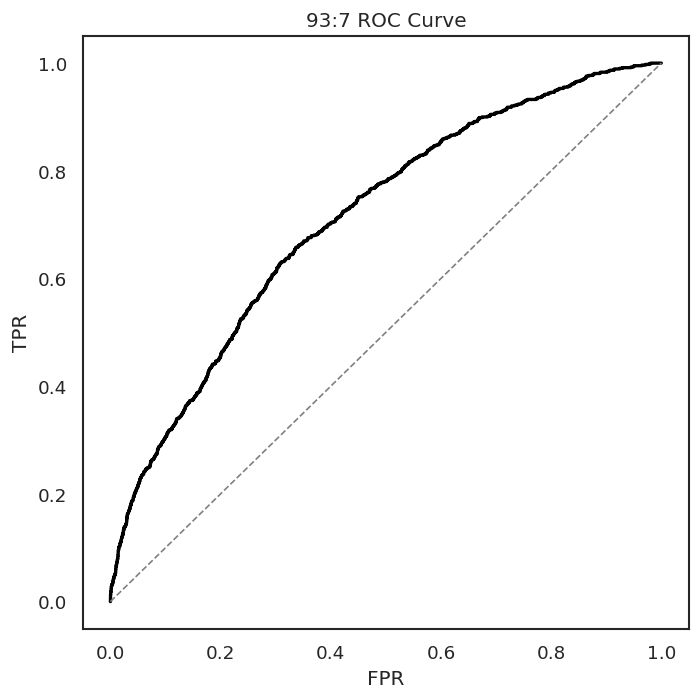


93:7 - Neural Network Results
Accuracy: 0.9345 (93.45%)
ROC-AUC: 0.7107 (71.07%)
FN Rate: 0.9867 (98.67%)
FP Rate: 0.0005 (0.05%)
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     11759
           1       0.65      0.01      0.03       830

    accuracy                           0.93     12589
   macro avg       0.79      0.51      0.50     12589
weighted avg       0.92      0.93      0.90     12589



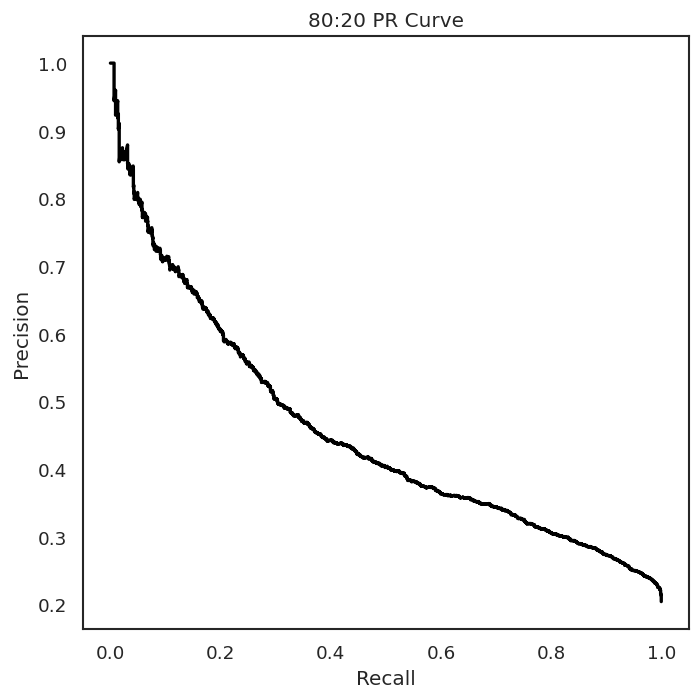

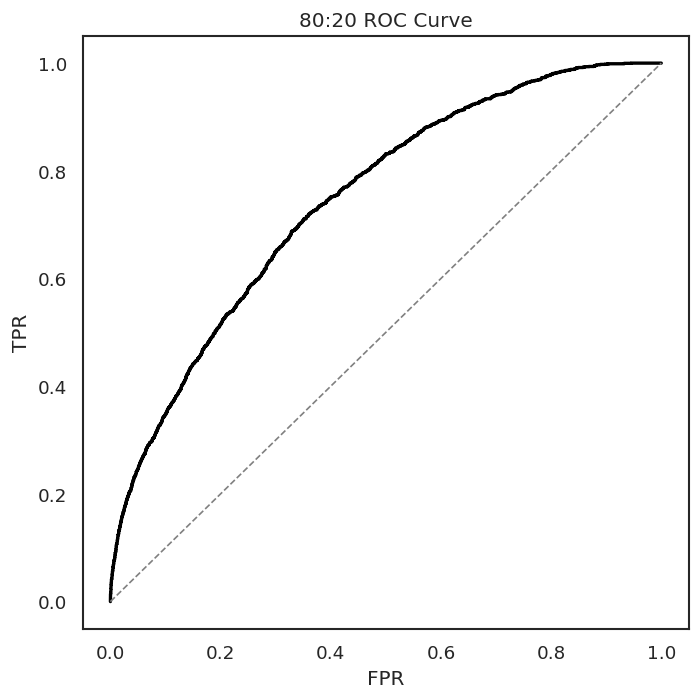


80:20 - Neural Network Results
Accuracy: 0.8108 (81.08%)
ROC-AUC: 0.7465 (74.65%)
FN Rate: 0.8520 (85.20%)
FP Rate: 0.0190 (1.90%)
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     10001
           1       0.67      0.15      0.24      2568

    accuracy                           0.81     12569
   macro avg       0.74      0.56      0.57     12569
weighted avg       0.79      0.81      0.76     12569



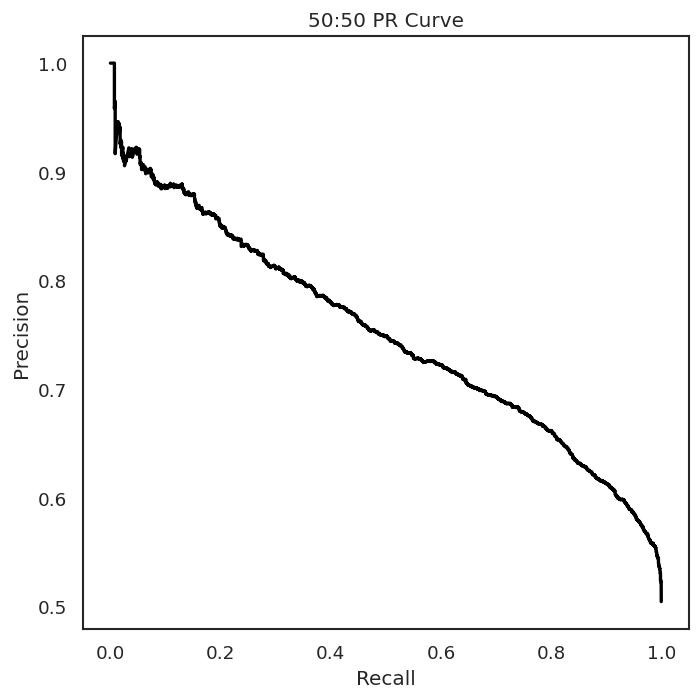

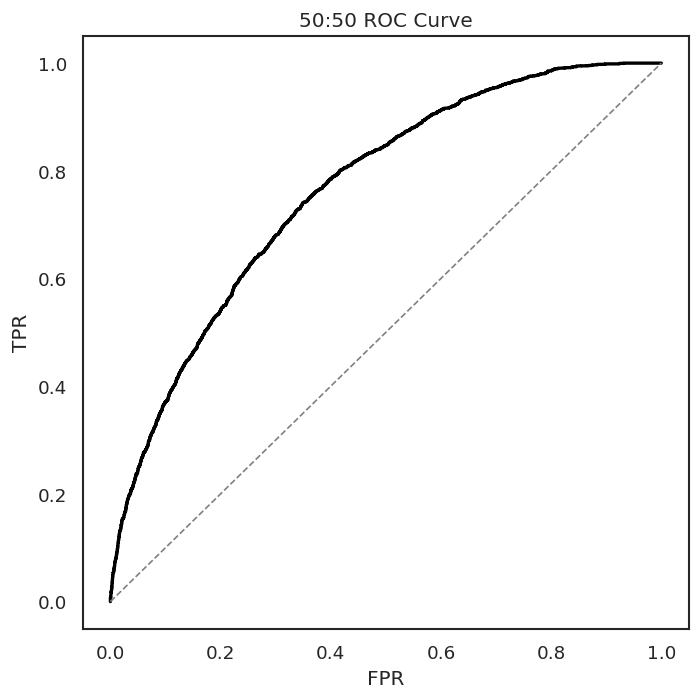


50:50 - Neural Network Results
Accuracy: 0.6914 (69.14%)
ROC-AUC: 0.7641 (76.41%)
FN Rate: 0.3056 (30.56%)
FP Rate: 0.3116 (31.16%)
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      6238
           1       0.69      0.69      0.69      6352

    accuracy                           0.69     12590
   macro avg       0.69      0.69      0.69     12590
weighted avg       0.69      0.69      0.69     12590



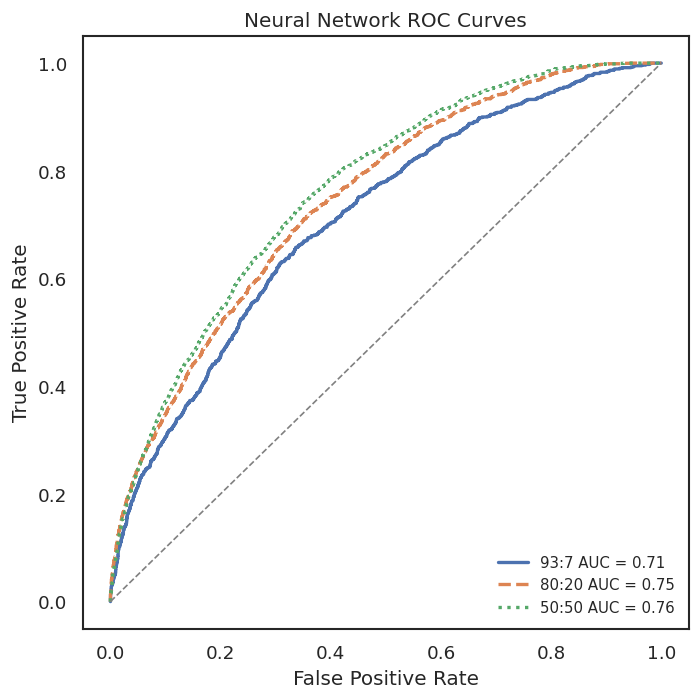

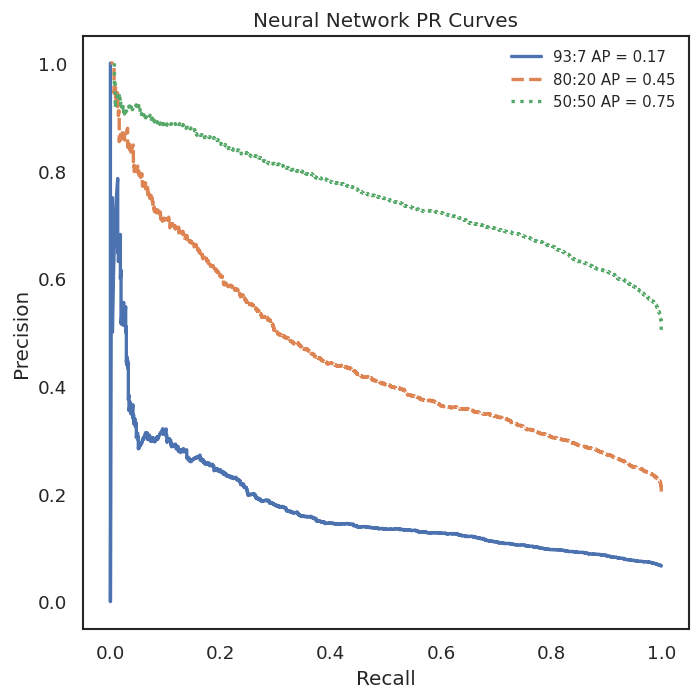

In [75]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score,
    confusion_matrix, precision_recall_curve, roc_curve,
    average_precision_score
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="white")

# neural network
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_selected_features = [
    'X17', 'X11', 'X13', 'X8', 'X10', 'X16', 'X2', 'X1', 'X18', 'X12'
]

nn_roc_data = {}
nn_pr_data = {}
line_styles = ['solid', 'dashed', 'dotted']

def train_and_evaluate_nn(model, X_train, y_train, X_test, y_test, label, selected_features):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[selected_features])
    X_test_scaled = scaler.transform(X_test[selected_features])

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)

    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1, 0]
    FP = cm[0, 1]
    FN_rate = FN / (FN + cm[1, 1])
    FP_rate = FP / (FP + cm[0, 0])

    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    nn_roc_data[label] = (fpr, tpr, round(roc_auc, 2))
    nn_pr_data[label] = (recall, precision, round(avg_precision, 2))

    # individual PR Curve
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, color='black', linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{label} PR Curve')
    sns.despine()
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    # individual ROC Curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='black', linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'{label} ROC Curve')
    sns.despine()
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    print(f"\n{label} - Neural Network Results")
    print(f"Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)")
    print(f"ROC-AUC: {roc_auc:.4f} ({roc_auc * 100:.2f}%)")
    print(f"FN Rate: {FN_rate:.4f} ({FN_rate * 100:.2f}%)")
    print(f"FP Rate: {FP_rate:.4f} ({FP_rate * 100:.2f}%)")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


# training and evalutaion
X_train_g1, X_test_g1, y_train_g1, y_test_g1 = train_test_split(group1_X_train, group1_y_train, test_size=0.2, random_state=42)
train_and_evaluate_nn(nn, X_train_g1, y_train_g1, X_test_g1, y_test_g1, "93:7", nn_selected_features)

X_train_g2, X_test_g2, y_train_g2, y_test_g2 = train_test_split(group2_X_train, group2_y_train, test_size=0.2, random_state=42)
train_and_evaluate_nn(nn, X_train_g2, y_train_g2, X_test_g2, y_test_g2, "80:20", nn_selected_features)

X_train_g3, X_test_g3, y_train_g3, y_test_g3 = train_test_split(group3_X_train, group3_y_train, test_size=0.2, random_state=42)
train_and_evaluate_nn(nn, X_train_g3, y_train_g3, X_test_g3, y_test_g3, "50:50", nn_selected_features)


# === Combined ROC Curve ===
plt.figure(figsize=(6, 6))
for i, (label, (fpr, tpr, auc)) in enumerate(nn_roc_data.items()):
    plt.plot(fpr, tpr, linestyle=line_styles[i], linewidth=2, label=f'{label} AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network ROC Curves')
plt.legend(loc='lower right', frameon=False, fontsize=9)
sns.despine()
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.grid(False)
plt.tight_layout()
plt.show()

# === Combined PR Curve ===
plt.figure(figsize=(6, 6))
for i, (label, (recall, precision, ap)) in enumerate(nn_pr_data.items()):
    plt.plot(recall, precision, linestyle=line_styles[i], linewidth=2, label=f'{label} AP = {ap:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Neural Network PR Curves')
plt.legend(loc='upper right', frameon=False, fontsize=9)
sns.despine()
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.grid(False)
plt.tight_layout()
plt.show()


## XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:01:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


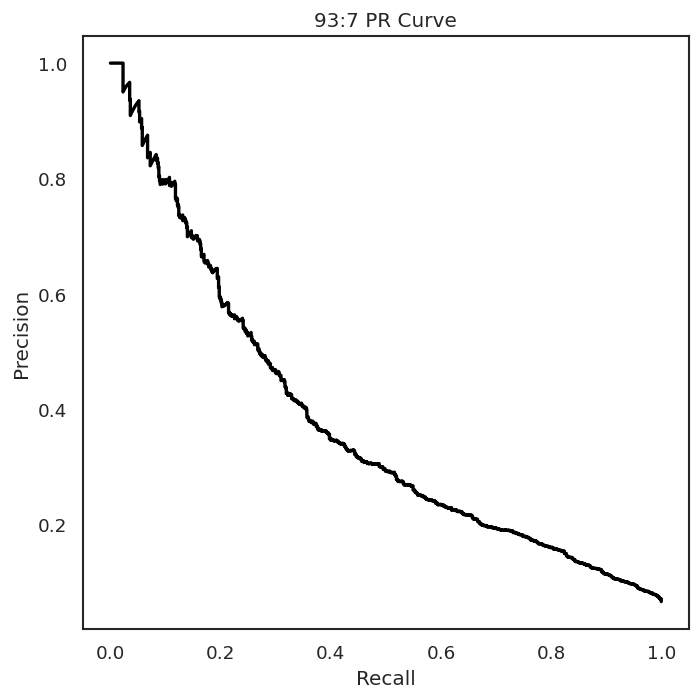

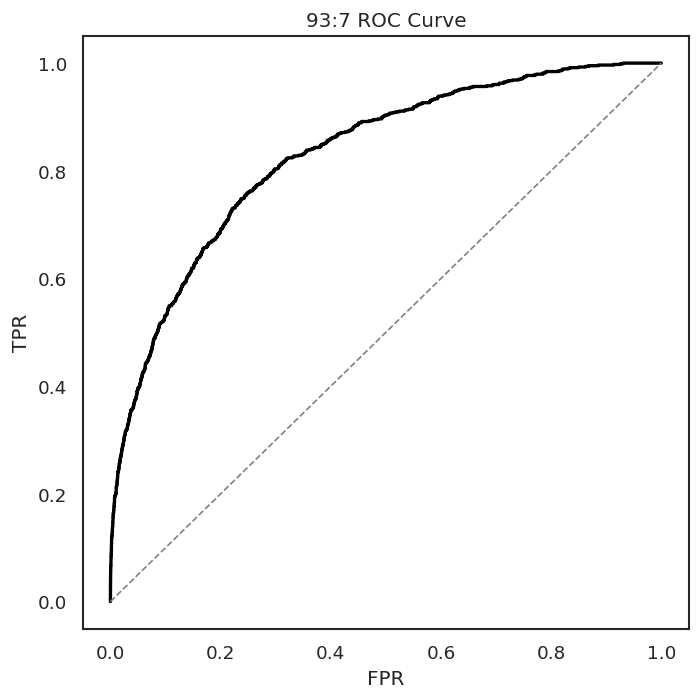


93:7 - XGBoost Results
Accuracy: 0.9398 (93.98%)
ROC-AUC: 0.8296 (82.96%)
FN Rate: 0.8831 (88.31%)
FP Rate: 0.0021 (0.21%)
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11759
           1       0.80      0.12      0.20       830

    accuracy                           0.94     12589
   macro avg       0.87      0.56      0.59     12589
weighted avg       0.93      0.94      0.92     12589



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:02:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


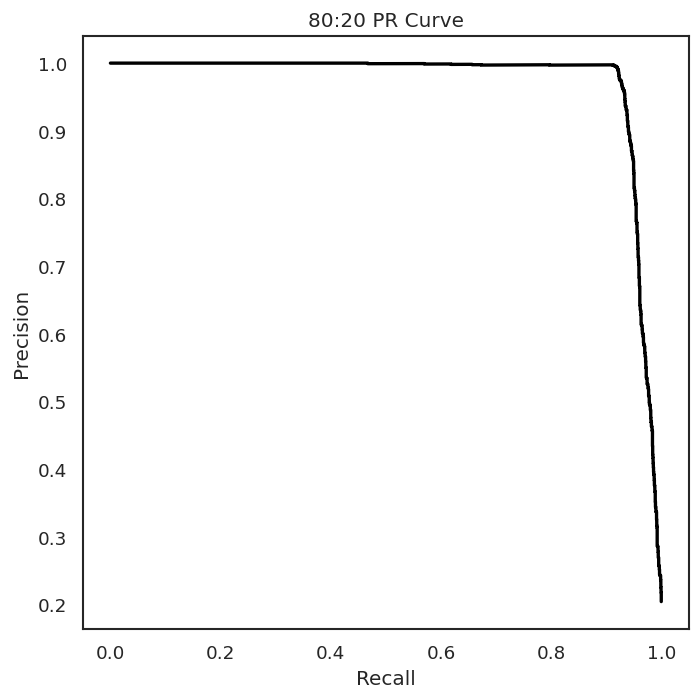

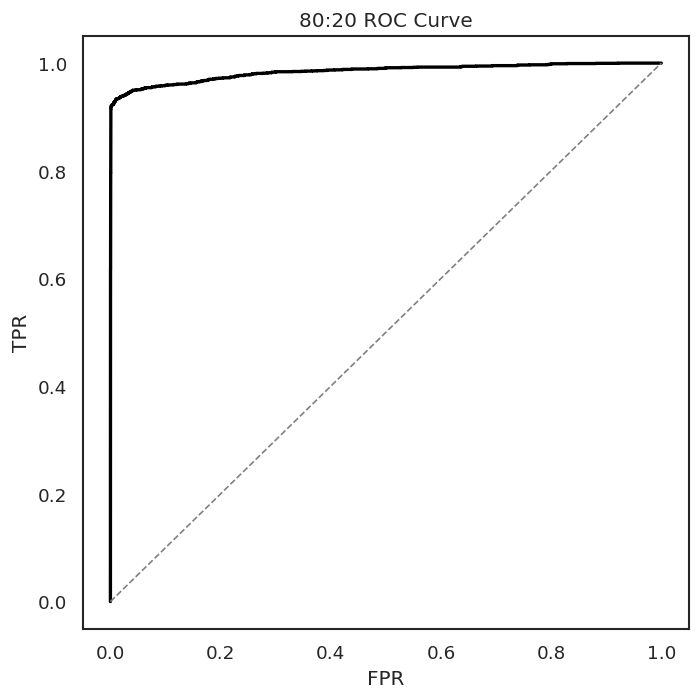


80:20 - XGBoost Results
Accuracy: 0.9788 (97.88%)
ROC-AUC: 0.9843 (98.43%)
FN Rate: 0.0713 (7.13%)
FP Rate: 0.0083 (0.83%)
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10001
           1       0.97      0.93      0.95      2568

    accuracy                           0.98     12569
   macro avg       0.97      0.96      0.97     12569
weighted avg       0.98      0.98      0.98     12569



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:02:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


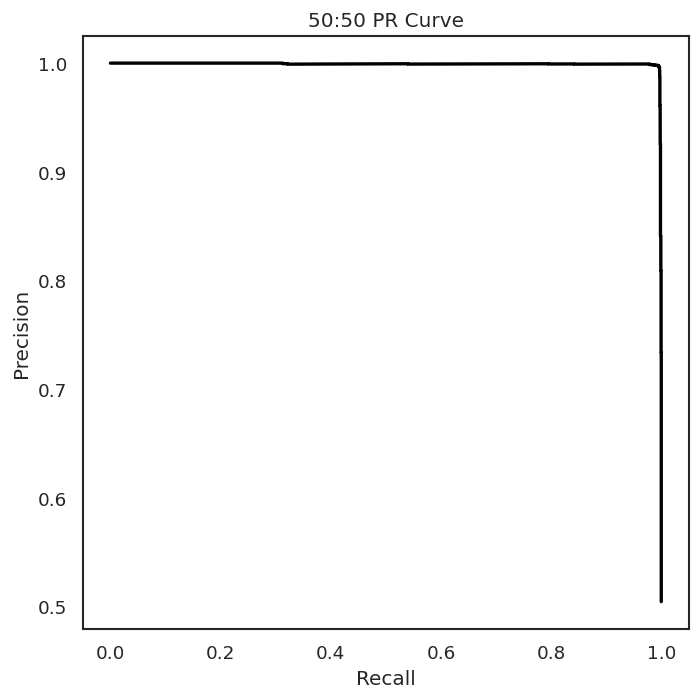

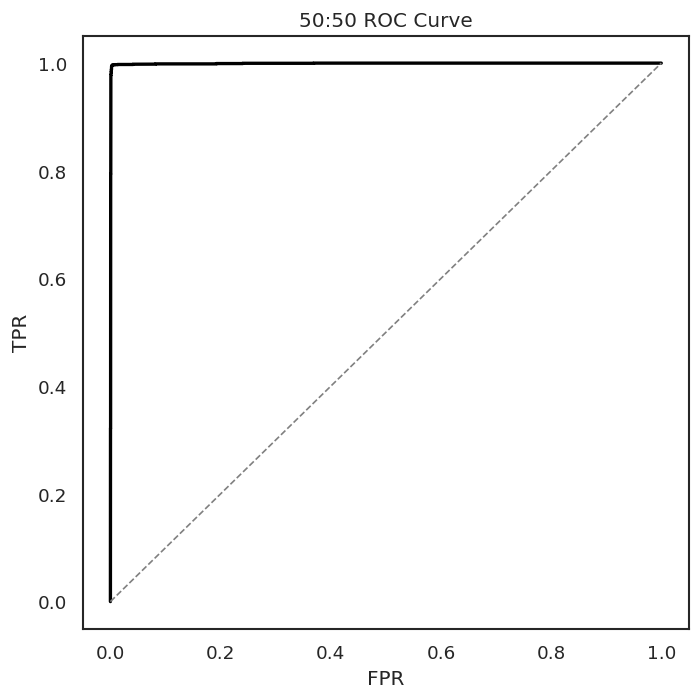


50:50 - XGBoost Results
Accuracy: 0.9825 (98.25%)
ROC-AUC: 0.9992 (99.92%)
FN Rate: 0.0025 (0.25%)
FP Rate: 0.0327 (3.27%)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      6238
           1       0.97      1.00      0.98      6352

    accuracy                           0.98     12590
   macro avg       0.98      0.98      0.98     12590
weighted avg       0.98      0.98      0.98     12590



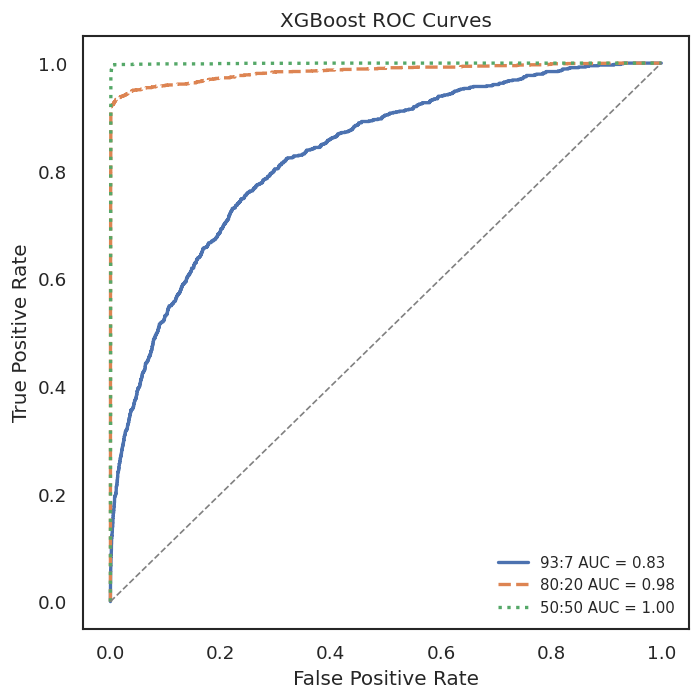

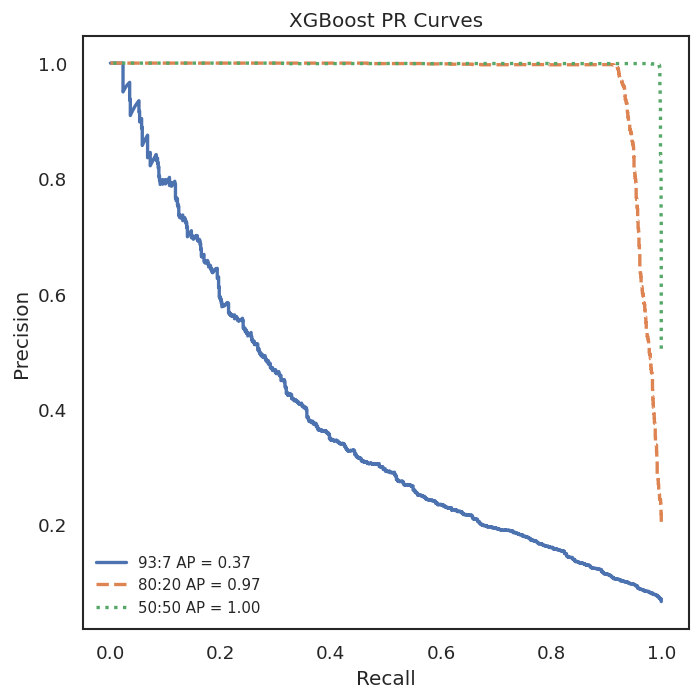

In [76]:
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score,
    confusion_matrix, precision_recall_curve, roc_curve,
    average_precision_score
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="white")

# XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=50,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_selected_features = ['X6', 'X8', 'X11', 'X17', 'X3', 'X1', 'X18', 'X5', 'X7', 'X9']

xgb_roc_data = {}
xgb_pr_data = {}
line_styles = ['solid', 'dashed', 'dotted']

def train_and_evaluate_xgb(model, X_train, y_train, X_test, y_test, label, selected_features):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[selected_features])
    X_test_scaled = scaler.transform(X_test[selected_features])

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)

    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1, 0]
    FP = cm[0, 1]
    FN_rate = FN / (FN + cm[1, 1])
    FP_rate = FP / (FP + cm[0, 0])

    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    xgb_roc_data[label] = (fpr, tpr, round(roc_auc, 2))
    xgb_pr_data[label] = (recall, precision, round(avg_precision, 2))

    # individual PR Curve
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, color='black', linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{label} PR Curve')
    sns.despine()
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    # individual ROC Curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='black', linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'{label} ROC Curve')
    sns.despine()
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    print(f"\n{label} - XGBoost Results")
    print(f"Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)")
    print(f"ROC-AUC: {roc_auc:.4f} ({roc_auc * 100:.2f}%)")
    print(f"FN Rate: {FN_rate:.4f} ({FN_rate * 100:.2f}%)")
    print(f"FP Rate: {FP_rate:.4f} ({FP_rate * 100:.2f}%)")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


# training and evalutaion
X_train_g1, X_test_g1, y_train_g1, y_test_g1 = train_test_split(group1_X_train, group1_y_train, test_size=0.2, random_state=42)
train_and_evaluate_xgb(xgb_model, X_train_g1, y_train_g1, X_test_g1, y_test_g1, "93:7", xgb_selected_features)

X_train_g2, X_test_g2, y_train_g2, y_test_g2 = train_test_split(group2_X_train, group2_y_train, test_size=0.2, random_state=42)
train_and_evaluate_xgb(xgb_model, X_train_g2, y_train_g2, X_test_g2, y_test_g2, "80:20", xgb_selected_features)

X_train_g3, X_test_g3, y_train_g3, y_test_g3 = train_test_split(group3_X_train, group3_y_train, test_size=0.2, random_state=42)
train_and_evaluate_xgb(xgb_model, X_train_g3, y_train_g3, X_test_g3, y_test_g3, "50:50", xgb_selected_features)


# === Combined ROC Curve ===
plt.figure(figsize=(6, 6))
for i, (label, (fpr, tpr, auc)) in enumerate(xgb_roc_data.items()):
    plt.plot(fpr, tpr, linestyle=line_styles[i], linewidth=2, label=f'{label} AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curves')
plt.legend(loc='lower right', frameon=False, fontsize=9)
sns.despine()
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.grid(False)
plt.tight_layout()
plt.show()

# === Combined Precision-Recall Curve ===
plt.figure(figsize=(6, 6))
for i, (label, (recall, precision, ap)) in enumerate(xgb_pr_data.items()):
    plt.plot(recall, precision, linestyle=line_styles[i], linewidth=2, label=f'{label} AP = {ap:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost PR Curves')
plt.legend(loc='lower left', frameon=False, fontsize=9)
sns.despine()
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.grid(False)
plt.tight_layout()
plt.show()


# **Ensemble method**



## Voting Ensemble

In [77]:
import numpy as np

# combine selected features from all models
log_reg_selected_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X8', 'X13', 'X11', 'X14', 'X18']
rf_selected_features = ['X8', 'X15', 'X3', 'X1', 'X7', 'X13', 'X17', 'X10', 'X6', 'X14']
nn_selected_features = ['X17', 'X11', 'X13', 'X8', 'X10', 'X16', 'X2', 'X1', 'X18', 'X12']
xgb_selected_features = ['X6', 'X8', 'X11', 'X17', 'X3', 'X1', 'X18', 'X5', 'X7', 'X9']

ensemble_features = list(np.unique(
    log_reg_selected_features + rf_selected_features + nn_selected_features + xgb_selected_features
))


In [78]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

# define individual models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
xgb_clf = xgb.XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=20, random_state=42, use_label_encoder=False, eval_metric='logloss')

# voting classifier (soft voting for probabilities)
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('rf', rf),
    ('nn', nn),
    ('xgb', xgb_clf)
], voting='soft')

# train on 80:20 dataset with features
voting_clf.fit(group2_X_train[ensemble_features], group2_y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:04:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('nn',
                              MLPClassifier(max_iter=1000, random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=20,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

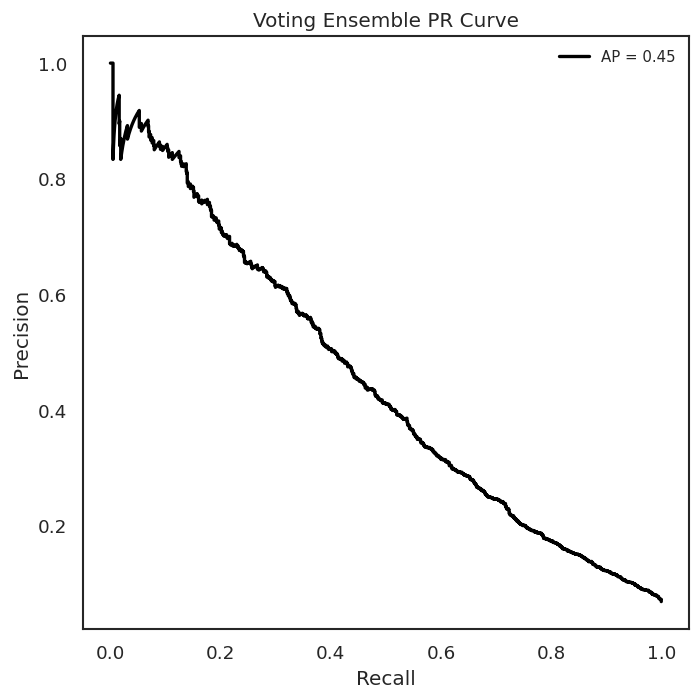

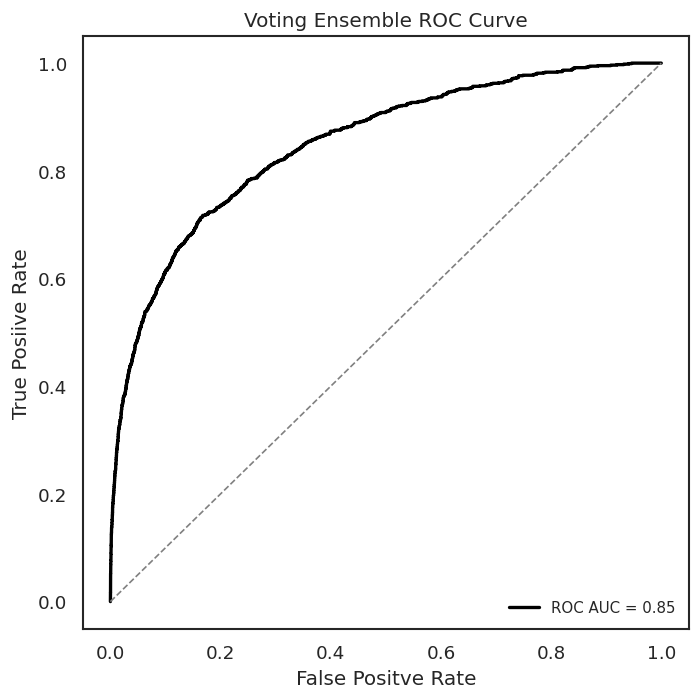

Voting Classifier Results
Accuracy: 0.9366 (93.66%)
ROC-AUC: 0.8495 (84.95%)
Average Precision (AP): 0.4454 (44.54%)
FN Rate: 0.9204 (92.04%)
FP Rate: 0.0010 (0.10%)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     14669
           1       0.86      0.08      0.15      1068

    accuracy                           0.94     15737
   macro avg       0.90      0.54      0.56     15737
weighted avg       0.93      0.94      0.91     15737



In [79]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, precision_recall_curve, roc_curve,
    average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

# predictions
y_pred = voting_clf.predict(X_test[ensemble_features])
y_proba = voting_clf.predict_proba(X_test[ensemble_features])[:, 1]

# metrics
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
fn_rate = fn / (fn + tp)
fp_rate = fp / (fp + tn)

precision, recall, _ = precision_recall_curve(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

# PR Curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='black', linewidth=2, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Voting Ensemble PR Curve')
plt.legend(loc='upper right', frameon=False, fontsize=9)
sns.despine()
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.grid(False)
plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='black', linewidth=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)
plt.xlabel('False Positve Rate')
plt.ylabel('True Posiive Rate')
plt.title('Voting Ensemble ROC Curve')
plt.legend(loc='lower right', frameon=False, fontsize=9)
sns.despine()
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.grid(False)
plt.tight_layout()
plt.show()

print("Voting Classifier Results")
print(f"Accuracy: {acc:.4f} ({acc * 100:.2f}%)")
print(f"ROC-AUC: {roc_auc:.4f} ({roc_auc * 100:.2f}%)")
print(f"Average Precision (AP): {avg_precision:.4f} ({avg_precision * 100:.2f}%)")
print(f"FN Rate: {fn_rate:.4f} ({fn_rate * 100:.2f}%)")
print(f"FP Rate: {fp_rate:.4f} ({fp_rate * 100:.2f}%)")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


## Stacking Ensemble


Stacking Ensemble - Group 2 (80:20) Results
Accuracy: 0.9411 (94.11%)
ROC-AUC: 0.8665 (86.65%)
FN Rate: 0.8249 (82.49%)
FP Rate: 0.0031 (0.31%)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14669
           1       0.80      0.18      0.29      1068

    accuracy                           0.94     15737
   macro avg       0.87      0.59      0.63     15737
weighted avg       0.93      0.94      0.92     15737



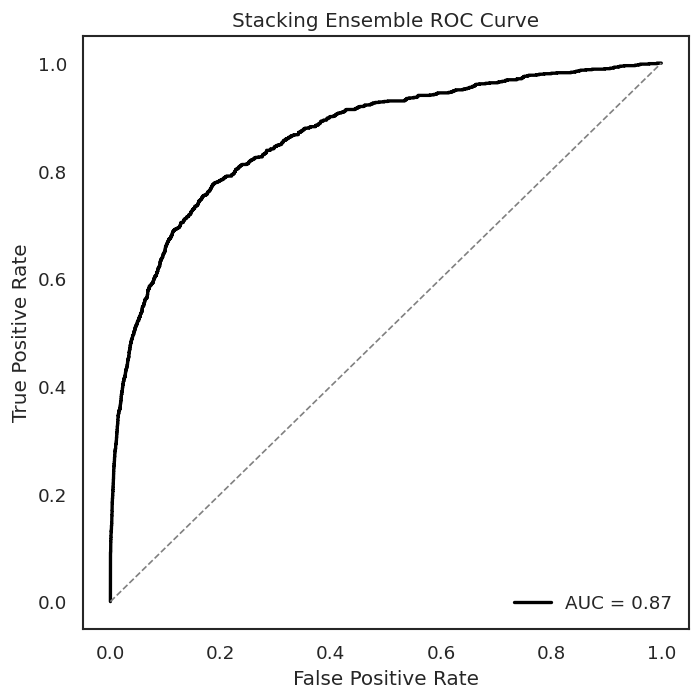

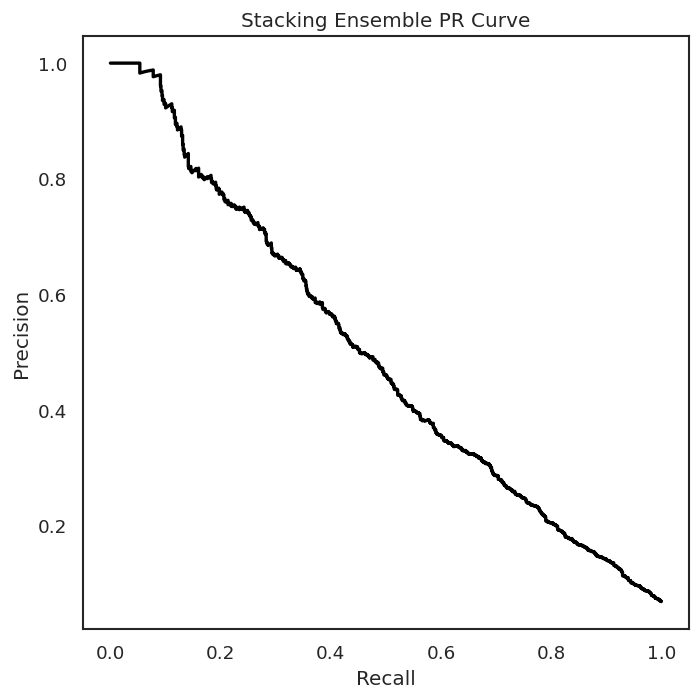

In [80]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="white")

ensemble_features = list(set(
    log_reg_selected_features
    + rf_selected_features
    + nn_selected_features
    + xgb_selected_features
))

# base learners
base_learners = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('nn', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=20,
                          eval_metric='logloss', random_state=42))
]

# meta classifier
meta_model = LogisticRegression(max_iter=1000, random_state=42)

stacked_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model, cv=5)
stacked_model.fit(group2_X_train[ensemble_features], group2_y_train)

y_pred = stacked_model.predict(X_test[ensemble_features])
y_proba = stacked_model.predict_proba(X_test[ensemble_features])[:, 1]

# metrics
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
fn_rate = fn / (fn + tp)
fp_rate = fp / (fp + tn)
roc_auc = roc_auc_score(y_test, y_proba)

print("\nStacking Ensemble - Group 2 (80:20) Results")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"ROC-AUC: {roc_auc:.4f} ({roc_auc*100:.2f}%)")
print(f"FN Rate: {fn_rate:.4f} ({fn_rate*100:.2f}%)")
print(f"FP Rate: {fp_rate:.4f} ({fp_rate*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='black', linewidth=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stacking Ensemble ROC Curve')
plt.legend(loc='lower right', frameon=False)
sns.despine()
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.grid(False)
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='black', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Stacking Ensemble PR Curve')
sns.despine()
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.grid(False)
plt.tight_layout()
plt.show()
